<!-- <div>
    <img src="attachment:image.png" align="right" width="150">
</div> -->

# <font color='#5D6D7E '> <center >Forecasting - SOL</center>
    
### Master Degree Program in Data Science and Advanced Analytics    
    
### <font color='#5D6D7E '> Business Cases with Data Science Project: 
> #### Group AA

### <font color='#5D6D7E '> Done by:
> #### - Beatriz Martins Selidónio Gomes, m20210545
> #### - Catarina Inês Lopes Garcez, m20210547    
> #### - Diogo André Domingues Pires, m20201076  
> #### - Rodrigo Faísca Guedes, m20210587 

---

<div>
    
# Table of Content<a class="anchor"><a id='toc'></a>

### <font color='#5D6D7E '> Import and Data Integration  
- [<font color='#000000'>Import the needed Libraries</font>](#third-bullet)<br> 

### <font color='#5D6D7E '> Data Exploration and Understanding    
- [<font color='#000000'>Initial Analysis (EDA - Exploratory Data Analysis)</font>](#fifth-bullet)<br> 
- [<font color='#000000'>Variables Distribution</font>](#seventh-bullet)<br>    
    
### <font color='#5D6D7E '> Data Preparation      
- [<font color='#000000'>Data Transformation</font>](#eighth-bullet)<br>
    
### <font color='#5D6D7E '> Modelling    
- [<font color='#000000'>Building LSTM Model</font>](#twentysecond-bullet)<br>   
- [<font color='#000000'>Get Best Parameters for LSTM</font>](#twentythird-bullet)<br> 
- [<font color='#000000'>Run the LSTM Model and Get Predictions</font>](#twentyfourth-bullet)<br>   
- [<font color='#000000'>Recursive Predictions</font>](#twentysixth-bullet)<br>   
  

</div>

---

# Import and Data Integration


## <font color='#5D6D7E '>Import the needed Libraries</font> <a class="anchor" id="third-bullet"></a>
  [Back to TOC](#toc)

In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Data Exploration and Understanding

## <font color='#5D6D7E'>Initial Analysis (EDA - Exploratory Data Analysis) </font> <a class="anchor" id="fifth-bullet"></a>
  [Back to TOC](#toc)


In [2]:
df = pd.read_csv('../data/data_aux/df_SOL.csv')
df

,Date,SOL-USD_ADJCLOSE,SOL-USD_CLOSE,SOL-USD_HIGH,SOL-USD_LOW,SOL-USD_OPEN,SOL-USD_VOLUME
0,2017-04-26,NaN,NaN,NaN,NaN,NaN,NaN
1,2017-04-27,NaN,NaN,NaN,NaN,NaN,NaN
2,2017-04-28,NaN,NaN,NaN,NaN,NaN,NaN
3,2017-04-29,NaN,NaN,NaN,NaN,NaN,NaN
4,2017-04-30,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
1821,2022-04-21,101.776138,101.776138,109.765327,100.767151,105.497673,1.838572e+09
1822,2022-04-22,100.612053,100.612053,103.498146,99.579430,101.757423,1.274794e+09
1823,2022-04-23,100.744438,100.744438,102.771233,98.781570,100.619781,8.232525e+08
1824,2022-04-24,99.235794,99.235794,102.216682,99.008514,100.727188,8.182660e+08


### Data Types

In [3]:
# Get to know the number of instances and Features, the DataTypes and if there are missing values in each Feature
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1826 entries, 0 to 1825
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date              1826 non-null   object 
 1   SOL-USD_ADJCLOSE  746 non-null    float64
 2   SOL-USD_CLOSE     746 non-null    float64
 3   SOL-USD_HIGH      746 non-null    float64
 4   SOL-USD_LOW       746 non-null    float64
 5   SOL-USD_OPEN      746 non-null    float64
 6   SOL-USD_VOLUME    746 non-null    float64
dtypes: float64(6), object(1)
memory usage: 100.0+ KB


### Missing Values

In [4]:
# Count the number of missing values for each Feature
df.isna().sum().to_frame().rename(columns={0: 'Count Missing Values'})

,Count Missing Values
Date,0
SOL-USD_ADJCLOSE,1080
SOL-USD_CLOSE,1080
SOL-USD_HIGH,1080
SOL-USD_LOW,1080
SOL-USD_OPEN,1080
SOL-USD_VOLUME,1080


### Descriptive Statistics

In [5]:
# Descriptive Statistics Table
df.describe().T

,count,mean,std,min,25%,50%,75%,max
SOL-USD_ADJCLOSE,746.0,5.650049e+01,6.889538e+01,0.515273,2.122762e+00,2.673679e+01,1.005615e+02,2.589343e+02
SOL-USD_CLOSE,746.0,5.650049e+01,6.889538e+01,0.515273,2.122762e+00,2.673679e+01,1.005615e+02,2.589343e+02
SOL-USD_HIGH,746.0,5.920374e+01,7.185546e+01,0.559759,2.252829e+00,2.823814e+01,1.034098e+02,2.600621e+02
SOL-USD_LOW,746.0,5.362986e+01,6.575030e+01,0.505194,1.979515e+00,2.531964e+01,9.551391e+01,2.461224e+02
SOL-USD_OPEN,746.0,5.640108e+01,6.897131e+01,0.513391,2.115551e+00,2.666828e+01,1.002374e+02,2.587816e+02
SOL-USD_VOLUME,746.0,1.104108e+09,1.658926e+09,652020.000000,1.290409e+07,3.182848e+08,1.867557e+09,1.706864e+10


In [6]:
# settings to display all columns
pd.set_option("display.max_columns", None)

# display the dataframe head
df.sample(n=10)

,Date,SOL-USD_ADJCLOSE,SOL-USD_CLOSE,SOL-USD_HIGH,SOL-USD_LOW,SOL-USD_OPEN,SOL-USD_VOLUME
1616,2021-09-28,131.537216,131.537216,139.294357,128.244827,136.508911,2.422543e+09
303,2018-02-23,NaN,NaN,NaN,NaN,NaN,NaN
444,2018-07-14,NaN,NaN,NaN,NaN,NaN,NaN
400,2018-05-31,NaN,NaN,NaN,NaN,NaN,NaN
1824,2022-04-24,99.235794,99.235794,102.216682,99.008514,100.727188,8.182660e+08
125,2017-08-29,NaN,NaN,NaN,NaN,NaN,NaN
324,2018-03-16,NaN,NaN,NaN,NaN,NaN,NaN
1573,2021-08-16,62.432465,62.432465,68.822372,52.465851,53.541149,3.799339e+09
473,2018-08-12,NaN,NaN,NaN,NaN,NaN,NaN
685,2019-03-12,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
#CHECK ROWS THAT HAVE ANY MISSING VALUE IN ONE OF THE COLUMNS
is_NaN = df.isnull()
row_has_NaN = is_NaN.any(axis=1)
rows_with_NaN = df[row_has_NaN]
rows_with_NaN

,Date,SOL-USD_ADJCLOSE,SOL-USD_CLOSE,SOL-USD_HIGH,SOL-USD_LOW,SOL-USD_OPEN,SOL-USD_VOLUME
0,2017-04-26,NaN,NaN,NaN,NaN,NaN,NaN
1,2017-04-27,NaN,NaN,NaN,NaN,NaN,NaN
2,2017-04-28,NaN,NaN,NaN,NaN,NaN,NaN
3,2017-04-29,NaN,NaN,NaN,NaN,NaN,NaN
4,2017-04-30,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
1075,2020-04-05,NaN,NaN,NaN,NaN,NaN,NaN
1076,2020-04-06,NaN,NaN,NaN,NaN,NaN,NaN
1077,2020-04-07,NaN,NaN,NaN,NaN,NaN,NaN
1078,2020-04-08,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
#FILTER OUT ROWS THAT ARE MISSING INFORMATION
df = df[~row_has_NaN]
df.reset_index(inplace=True, drop=True)
df

,Date,SOL-USD_ADJCLOSE,SOL-USD_CLOSE,SOL-USD_HIGH,SOL-USD_LOW,SOL-USD_OPEN,SOL-USD_VOLUME
0,2020-04-10,0.951054,0.951054,1.313487,0.694187,0.832005,8.736428e+07
1,2020-04-11,0.776819,0.776819,1.049073,0.765020,0.951054,4.386244e+07
2,2020-04-12,0.882507,0.882507,0.956670,0.762426,0.785448,3.873690e+07
3,2020-04-13,0.777832,0.777832,0.891603,0.773976,0.890760,1.821128e+07
4,2020-04-14,0.661925,0.661925,0.796472,0.628169,0.777832,1.674761e+07
...,...,...,...,...,...,...,...
741,2022-04-21,101.776138,101.776138,109.765327,100.767151,105.497673,1.838572e+09
742,2022-04-22,100.612053,100.612053,103.498146,99.579430,101.757423,1.274794e+09
743,2022-04-23,100.744438,100.744438,102.771233,98.781570,100.619781,8.232525e+08
744,2022-04-24,99.235794,99.235794,102.216682,99.008514,100.727188,8.182660e+08


# Data Preparation


## <font color='#5D6D7E'>Data Transformation</font> <a class="anchor" id="eighth-bullet"></a>
  [Back to TOC](#toc)

 __`Duplicates`__

In [9]:
# Checking if exist duplicated observations
print(f'\033[1m' + "Number of duplicates: " + '\033[0m', df.duplicated().sum())  

Number of duplicates:  0


 __`Convert Date to correct format`__

In [10]:
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')
df

,Date,SOL-USD_ADJCLOSE,SOL-USD_CLOSE,SOL-USD_HIGH,SOL-USD_LOW,SOL-USD_OPEN,SOL-USD_VOLUME
0,2020-04-10,0.951054,0.951054,1.313487,0.694187,0.832005,8.736428e+07
1,2020-04-11,0.776819,0.776819,1.049073,0.765020,0.951054,4.386244e+07
2,2020-04-12,0.882507,0.882507,0.956670,0.762426,0.785448,3.873690e+07
3,2020-04-13,0.777832,0.777832,0.891603,0.773976,0.890760,1.821128e+07
4,2020-04-14,0.661925,0.661925,0.796472,0.628169,0.777832,1.674761e+07
...,...,...,...,...,...,...,...
741,2022-04-21,101.776138,101.776138,109.765327,100.767151,105.497673,1.838572e+09
742,2022-04-22,100.612053,100.612053,103.498146,99.579430,101.757423,1.274794e+09
743,2022-04-23,100.744438,100.744438,102.771233,98.781570,100.619781,8.232525e+08
744,2022-04-24,99.235794,99.235794,102.216682,99.008514,100.727188,8.182660e+08


 __`Get percentual difference between open and close values and low and high values`__

In [11]:
df['pctDiff_CloseOpen'] = abs((df[df.columns[2]]-df[df.columns[5]])/df[df.columns[2]])*100
df['pctDiff_HighLow'] = abs((df[df.columns[3]]-df[df.columns[4]])/df[df.columns[4]])*100
df.head()

,Date,SOL-USD_ADJCLOSE,SOL-USD_CLOSE,SOL-USD_HIGH,SOL-USD_LOW,SOL-USD_OPEN,SOL-USD_VOLUME,pctDiff_CloseOpen,pctDiff_HighLow
0,2020-04-10,0.951054,0.951054,1.313487,0.694187,0.832005,87364276.0,12.517581,89.212284
1,2020-04-11,0.776819,0.776819,1.049073,0.765020,0.951054,43862444.0,22.429290,37.130136
2,2020-04-12,0.882507,0.882507,0.956670,0.762426,0.785448,38736897.0,10.998101,25.477091
3,2020-04-13,0.777832,0.777832,0.891603,0.773976,0.890760,18211285.0,14.518307,15.197753
4,2020-04-14,0.661925,0.661925,0.796472,0.628169,0.777832,16747614.0,17.510587,26.792633


In [12]:
def plot_coinValue(df):
    
    #Get coin name
    coin_name = df.columns[2].split('-')[0]
    
    #Get date and coin value
    x = df['Date']
    y = df[df.columns[2]] # ADA-USD_CLOSE
    
    #Get the volume of trades
    v = df[df.columns[-3]]/1e9
    
    #Get percentual diferences
    y2 = df[df.columns[-1]] # pctDiff_HighLow
    y1= df[df.columns[-2]]  # pctDiff_CloseOpen
    
    fig, axs = plt.subplots(3, 1, figsize=(12,14))
    
    axs[0].plot(x, y)
    axs[2].plot(x, v)
    
    # plotting the line 1 points 
    axs[1].plot(x, y1, label = "Close/Open")

    # plotting the line 2 points 
    axs[1].plot(x, y2, label = "High/Low")
    axs[1].legend()
    
    axs[0].title.set_text('Time Evolution of '+ coin_name)
    axs[0].set(xlabel="", ylabel="Close Value in USD$")
    
    axs[2].title.set_text('Volume of trades of '+ coin_name)
    axs[2].set(xlabel="", ylabel="Total number of trades in billions")
    
    
    axs[1].title.set_text('Daily Market percentual differences of '+ coin_name)
    axs[1].set(xlabel="", ylabel="Percentage (%)")
    
    plt.savefig('../analysis/'+coin_name +'_stats'+'.png')
    
    return coin_name

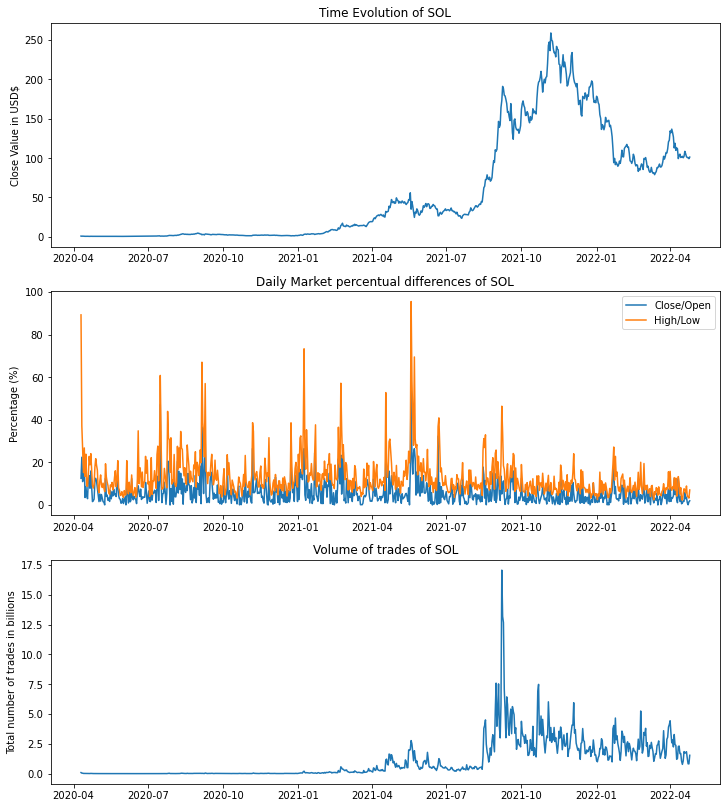

In [13]:
coin_name = plot_coinValue(df)

In [14]:
df_complete = df.copy(deep=True)
#FILTER DATASET
df = df.loc[df['Date']>= '2021-11-01']
df

,Date,SOL-USD_ADJCLOSE,SOL-USD_CLOSE,SOL-USD_HIGH,SOL-USD_LOW,SOL-USD_OPEN,SOL-USD_VOLUME,pctDiff_CloseOpen,pctDiff_HighLow
570,2021-11-01,203.545090,203.545090,211.360840,198.238968,202.629211,3.157613e+09,0.449963,6.619219
571,2021-11-02,220.239594,220.239594,222.233032,201.180389,203.517914,3.020087e+09,7.592495,10.464560
572,2021-11-03,242.898819,242.898819,246.321533,216.196198,221.076752,6.024951e+09,8.984015,13.934258
573,2021-11-04,247.387772,247.387772,250.466339,235.150879,243.097809,4.440296e+09,1.734105,6.513035
574,2021-11-05,236.474335,236.474335,248.383911,231.160812,247.270935,2.752871e+09,4.565654,7.450700
...,...,...,...,...,...,...,...,...,...
741,2022-04-21,101.776138,101.776138,109.765327,100.767151,105.497673,1.838572e+09,3.656589,8.929673
742,2022-04-22,100.612053,100.612053,103.498146,99.579430,101.757423,1.274794e+09,1.138403,3.935267
743,2022-04-23,100.744438,100.744438,102.771233,98.781570,100.619781,8.232525e+08,0.123736,4.038873
744,2022-04-24,99.235794,99.235794,102.216682,99.008514,100.727188,8.182660e+08,1.502879,3.240295


# Modelling


## <font color='#5D6D7E'>Building LSTM Model</font> <a class="anchor" id="twentysecond-bullet"></a>
  [Back to TOC](#toc)

## Strategy

Create a DF (windowed_df) where the middle columns will correspond to the close values of X days before the target date and the final column will correspond to the close value of the target date. Use these values for prediction and play with the value of X

In [15]:
def get_windowed_df(X, df):
    start_Date = df['Date'] + pd.Timedelta(days=X)
    
    perm = np.zeros((1,X+1))
    
    #Get labels for DataFrame
    j=1
    labels=[]
    
    while j <= X:
        label = 'closeValue_' + str(j) + 'daysBefore'
        labels.append(label)
        
        j+=1
 
    labels.append('closeValue')
    
    for i in range(X,df.shape[0]):
        temp = np.zeros((1,X+1))
        
        #Date for i-th day
        #temp[0,0] = df.iloc[i]['Date']
        
        #Close values for k days before
        for k in range(X):           
            temp[0,k] = df.iloc[i-k-1,2]
            
        #Close value for i-th date
        temp[0,-1] = df.iloc[i,2]
        

        #Add values to the permanent frame
        perm = np.vstack((perm,temp))
        
        #Get the array in dataframe form
        windowed_df = pd.DataFrame(perm[1:,:], columns = labels)
        
    return windowed_df

In [16]:
#Get the dataframe and append the dates
windowed_df = get_windowed_df(4, df)
windowed_df['Date'] = df.iloc[4:]['Date'].reset_index(drop=True)
windowed_df

,closeValue_1daysBefore,closeValue_2daysBefore,closeValue_3daysBefore,closeValue_4daysBefore,closeValue,Date
0,247.387772,242.898819,220.239594,203.545090,236.474335,2021-11-05
1,236.474335,247.387772,242.898819,220.239594,258.934326,2021-11-06
2,258.934326,236.474335,247.387772,242.898819,249.823486,2021-11-07
3,249.823486,258.934326,236.474335,247.387772,248.467178,2021-11-08
4,248.467178,249.823486,258.934326,236.474335,239.213135,2021-11-09
...,...,...,...,...,...,...
167,105.497002,108.582031,102.158531,100.409698,101.776138,2022-04-21
168,101.776138,105.497002,108.582031,102.158531,100.612053,2022-04-22
169,100.612053,101.776138,105.497002,108.582031,100.744438,2022-04-23
170,100.744438,100.612053,101.776138,105.497002,99.235794,2022-04-24


In [17]:
#Get the X,y and dates into a numpy array to apply on a model

def windowed_df_to_date_X_y(windowed_dataframe):
    df_as_np = windowed_dataframe.to_numpy()

    dates = df_as_np[:, -1]

    middle_matrix = df_as_np[:, 0:-2]
    X = middle_matrix.reshape((len(dates), middle_matrix.shape[1], 1))

    Y = df_as_np[:, -2]

    return dates, X.astype(np.float32), Y.astype(np.float32)

dates, X, y = windowed_df_to_date_X_y(windowed_df)

dates.shape, X.shape, y.shape

((172,), (172, 4, 1), (172,))

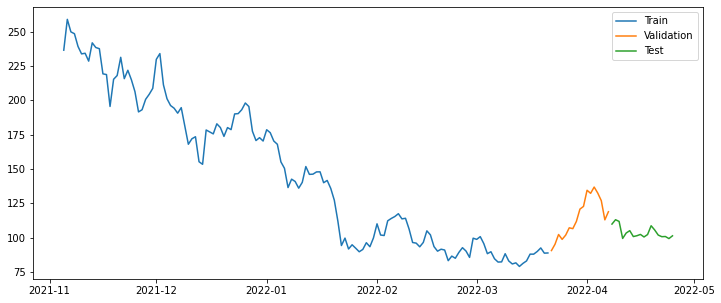

In [18]:
#Partition for train, validation and test

q_80 = int(len(dates) * .8)
q_90 = int(len(dates) * .9)

dates_train, X_train, y_train = dates[:q_80], X[:q_80], y[:q_80]

dates_val, X_val, y_val = dates[q_80:q_90], X[q_80:q_90], y[q_80:q_90]
dates_test, X_test, y_test = dates[q_90:], X[q_90:], y[q_90:]

fig,axs = plt.subplots(1, 1, figsize=(12,5))

#Plot the partitions
axs.plot(dates_train, y_train)
axs.plot(dates_val, y_val)
axs.plot(dates_test, y_test)

axs.legend(['Train', 'Validation', 'Test'])

fig.savefig('../analysis/'+coin_name +'_partition'+'.png')

## <font color='#5D6D7E'>Get Best Parameters for LSTM</font> <a class="anchor" id="twentythird-bullet"></a>
  [Back to TOC](#toc)

In [19]:
#!pip install tensorflow

In [23]:
import os
os.environ['PYTHONHASHSEED']= '0'
import numpy as np
np.random.seed(1)
import random as rn
rn.seed(1)
import tensorflow as tf
tf.random.set_seed(1)

from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers
from sklearn.metrics import mean_squared_error

# Function to create LSTM model and compute the MSE value for the given parameters
def check_model(X_train, y_train, X_val, y_val, X_test, y_test, learning_rate,epoch,batch):
    
    # create model
    model = Sequential([layers.Input((4, 1)),
                        layers.LSTM(64),
                        layers.Dense(32, activation='relu'),
                        layers.Dense(32, activation='relu'),
                        layers.Dense(1)])
    # Compile model
    model.compile(loss='mse', optimizer=Adam(learning_rate=learning_rate), metrics=['mean_absolute_error'])
    
    model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=epoch, shuffle=False, batch_size=batch, verbose=2)
    
    test_predictions = model.predict(X_test).flatten()
    
    LSTM_mse = mean_squared_error(y_test, test_predictions)
    
    return LSTM_mse

#Function that iterates the different parameters and gets the ones corresponding to the lowest MSE score.
def search_parameters(batch_size, epochs, learn_rate, X_train, y_train, X_val, y_val, X_test, y_test):
    
    best_score = float('inf')
    
    for b in batch_size:
        for e in epochs:
            for l in learn_rate:
                print('Batch Size: ' + str(b))
                print('Number of Epochs: ' + str(e))
                print('Value of Learning Rate: ' + str(l))
                try:
                    mse = check_model(X_train, y_train, X_val, y_val, X_test, y_test,l,e,b)
                    print('MSE=%.3f' % (mse))
                    if mse < best_score:
                        best_score = mse
                        top_params = [b, e, l]
                except:
                    continue
                    
    print('Best MSE=%.3f' % (best_score))
    print('Optimal Batch Size: ' + str(top_params[0]))
    print('Optimal Number of Epochs: ' + str(top_params[1]))
    print('Optimal Value of Learning Rate: ' + str(top_params[2]))
                        

# define parameters
batch_size = [10, 100, 1000]
epochs = [50, 100]
learn_rate = np.linspace(0.001,0.1, num=10)

warnings.filterwarnings("ignore")
search_parameters(batch_size, epochs, learn_rate, X_train, y_train, X_val, y_val, X_test, y_test)

Batch Size: 10
Number of Epochs: 50
Value of Learning Rate: 0.001
Epoch 1/50
14/14 - 1s - loss: 24560.3281 - mean_absolute_error: 147.2492 - val_loss: 13260.3955 - val_mean_absolute_error: 114.2697 - 1s/epoch - 97ms/step
Epoch 2/50
14/14 - 0s - loss: 24322.2969 - mean_absolute_error: 146.4639 - val_loss: 13078.9229 - val_mean_absolute_error: 113.4724 - 45ms/epoch - 3ms/step
Epoch 3/50
14/14 - 0s - loss: 24033.1035 - mean_absolute_error: 145.4221 - val_loss: 12772.2266 - val_mean_absolute_error: 112.1120 - 41ms/epoch - 3ms/step
Epoch 4/50
14/14 - 0s - loss: 23564.3281 - mean_absolute_error: 143.6932 - val_loss: 12255.9326 - val_mean_absolute_error: 109.7857 - 40ms/epoch - 3ms/step
Epoch 5/50
14/14 - 0s - loss: 22780.6836 - mean_absolute_error: 140.7990 - val_loss: 11474.0088 - val_mean_absolute_error: 106.1623 - 40ms/epoch - 3ms/step
Epoch 6/50
14/14 - 0s - loss: 21579.1289 - mean_absolute_error: 136.1898 - val_loss: 10228.6543 - val_mean_absolute_error: 100.1147 - 40ms/epoch - 3ms/step

Epoch 4/50
14/14 - 0s - loss: 3284.4390 - mean_absolute_error: 50.7899 - val_loss: 311.5170 - val_mean_absolute_error: 14.7299 - 42ms/epoch - 3ms/step
Epoch 5/50
14/14 - 0s - loss: 4051.7253 - mean_absolute_error: 57.0343 - val_loss: 668.6943 - val_mean_absolute_error: 21.6855 - 41ms/epoch - 3ms/step
Epoch 6/50
14/14 - 0s - loss: 3367.1162 - mean_absolute_error: 52.1493 - val_loss: 515.5988 - val_mean_absolute_error: 18.4565 - 41ms/epoch - 3ms/step
Epoch 7/50
14/14 - 0s - loss: 3603.5725 - mean_absolute_error: 53.7060 - val_loss: 448.5110 - val_mean_absolute_error: 17.3813 - 42ms/epoch - 3ms/step
Epoch 8/50
14/14 - 0s - loss: 3693.8914 - mean_absolute_error: 54.7982 - val_loss: 814.5322 - val_mean_absolute_error: 24.7399 - 41ms/epoch - 3ms/step
Epoch 9/50
14/14 - 0s - loss: 3180.4783 - mean_absolute_error: 50.5033 - val_loss: 534.2324 - val_mean_absolute_error: 18.8223 - 42ms/epoch - 3ms/step
Epoch 10/50
14/14 - 0s - loss: 3707.7224 - mean_absolute_error: 54.6784 - val_loss: 608.9933 -

Epoch 8/50
14/14 - 0s - loss: 4156.8584 - mean_absolute_error: 58.3014 - val_loss: 506.2900 - val_mean_absolute_error: 18.2470 - 42ms/epoch - 3ms/step
Epoch 9/50
14/14 - 0s - loss: 3810.8284 - mean_absolute_error: 55.5776 - val_loss: 332.0612 - val_mean_absolute_error: 15.1264 - 41ms/epoch - 3ms/step
Epoch 10/50
14/14 - 0s - loss: 4399.7783 - mean_absolute_error: 60.0171 - val_loss: 490.5737 - val_mean_absolute_error: 18.0043 - 41ms/epoch - 3ms/step
Epoch 11/50
14/14 - 0s - loss: 3966.2332 - mean_absolute_error: 56.8405 - val_loss: 313.0545 - val_mean_absolute_error: 14.7677 - 41ms/epoch - 3ms/step
Epoch 12/50
14/14 - 0s - loss: 4153.8125 - mean_absolute_error: 58.2590 - val_loss: 463.8141 - val_mean_absolute_error: 17.5765 - 41ms/epoch - 3ms/step
Epoch 13/50
14/14 - 0s - loss: 3770.7527 - mean_absolute_error: 54.9748 - val_loss: 374.6900 - val_mean_absolute_error: 15.9643 - 42ms/epoch - 3ms/step
Epoch 14/50
14/14 - 0s - loss: 4305.0283 - mean_absolute_error: 59.4658 - val_loss: 500.35

Epoch 12/50
14/14 - 0s - loss: 4413.4653 - mean_absolute_error: 60.3825 - val_loss: 261.6628 - val_mean_absolute_error: 13.6287 - 41ms/epoch - 3ms/step
Epoch 13/50
14/14 - 0s - loss: 4676.5708 - mean_absolute_error: 61.5626 - val_loss: 351.5923 - val_mean_absolute_error: 15.4810 - 40ms/epoch - 3ms/step
Epoch 14/50
14/14 - 0s - loss: 4453.6318 - mean_absolute_error: 60.5801 - val_loss: 294.9180 - val_mean_absolute_error: 14.3971 - 42ms/epoch - 3ms/step
Epoch 15/50
14/14 - 0s - loss: 4398.0049 - mean_absolute_error: 59.5294 - val_loss: 280.9367 - val_mean_absolute_error: 14.0846 - 41ms/epoch - 3ms/step
Epoch 16/50
14/14 - 0s - loss: 4660.3794 - mean_absolute_error: 61.9007 - val_loss: 252.0807 - val_mean_absolute_error: 13.4369 - 41ms/epoch - 3ms/step
Epoch 17/50
14/14 - 0s - loss: 4773.7676 - mean_absolute_error: 62.3549 - val_loss: 324.6262 - val_mean_absolute_error: 14.9897 - 41ms/epoch - 3ms/step
Epoch 18/50
14/14 - 0s - loss: 4521.9741 - mean_absolute_error: 60.9601 - val_loss: 299.

Epoch 16/50
14/14 - 0s - loss: 5115.6509 - mean_absolute_error: 64.7567 - val_loss: 208.5380 - val_mean_absolute_error: 12.6825 - 41ms/epoch - 3ms/step
Epoch 17/50
14/14 - 0s - loss: 5221.7490 - mean_absolute_error: 65.2780 - val_loss: 221.6740 - val_mean_absolute_error: 12.8354 - 40ms/epoch - 3ms/step
Epoch 18/50
14/14 - 0s - loss: 5083.6318 - mean_absolute_error: 64.5362 - val_loss: 213.7835 - val_mean_absolute_error: 12.7366 - 41ms/epoch - 3ms/step
Epoch 19/50
14/14 - 0s - loss: 5144.2593 - mean_absolute_error: 64.8216 - val_loss: 225.1324 - val_mean_absolute_error: 12.9027 - 40ms/epoch - 3ms/step
Epoch 20/50
14/14 - 0s - loss: 5043.9521 - mean_absolute_error: 64.2738 - val_loss: 219.8342 - val_mean_absolute_error: 12.7970 - 41ms/epoch - 3ms/step
Epoch 21/50
14/14 - 0s - loss: 5074.9092 - mean_absolute_error: 64.4043 - val_loss: 229.6156 - val_mean_absolute_error: 12.9826 - 40ms/epoch - 3ms/step
Epoch 22/50
14/14 - 0s - loss: 4999.5791 - mean_absolute_error: 63.9864 - val_loss: 226.

Epoch 20/50
14/14 - 0s - loss: 4769.9956 - mean_absolute_error: 62.6364 - val_loss: 232.8713 - val_mean_absolute_error: 13.0365 - 41ms/epoch - 3ms/step
Epoch 21/50
14/14 - 0s - loss: 4916.2422 - mean_absolute_error: 63.2724 - val_loss: 274.6166 - val_mean_absolute_error: 13.9342 - 40ms/epoch - 3ms/step
Epoch 22/50
14/14 - 0s - loss: 4733.0718 - mean_absolute_error: 62.3584 - val_loss: 248.5219 - val_mean_absolute_error: 13.3609 - 40ms/epoch - 3ms/step
Epoch 23/50
14/14 - 0s - loss: 4815.5933 - mean_absolute_error: 62.6740 - val_loss: 281.1159 - val_mean_absolute_error: 14.0887 - 40ms/epoch - 3ms/step
Epoch 24/50
14/14 - 0s - loss: 4689.7568 - mean_absolute_error: 62.0424 - val_loss: 264.0706 - val_mean_absolute_error: 13.6744 - 40ms/epoch - 3ms/step
Epoch 25/50
14/14 - 0s - loss: 4731.2437 - mean_absolute_error: 62.1596 - val_loss: 289.1666 - val_mean_absolute_error: 14.2715 - 40ms/epoch - 3ms/step
Epoch 26/50
14/14 - 0s - loss: 4643.5381 - mean_absolute_error: 61.7117 - val_loss: 279.

Epoch 24/50
14/14 - 0s - loss: 5103.1372 - mean_absolute_error: 64.5993 - val_loss: 219.7158 - val_mean_absolute_error: 12.7945 - 40ms/epoch - 3ms/step
Epoch 25/50
14/14 - 0s - loss: 5075.0615 - mean_absolute_error: 64.4119 - val_loss: 224.8980 - val_mean_absolute_error: 12.8983 - 40ms/epoch - 3ms/step
Epoch 26/50
14/14 - 0s - loss: 5025.8716 - mean_absolute_error: 64.1152 - val_loss: 227.9568 - val_mean_absolute_error: 12.9539 - 41ms/epoch - 3ms/step
Epoch 27/50
14/14 - 0s - loss: 4994.3662 - mean_absolute_error: 63.9076 - val_loss: 233.5842 - val_mean_absolute_error: 13.0479 - 40ms/epoch - 3ms/step
Epoch 28/50
14/14 - 0s - loss: 4949.4634 - mean_absolute_error: 63.6318 - val_loss: 237.5082 - val_mean_absolute_error: 13.1085 - 40ms/epoch - 3ms/step
Epoch 29/50
14/14 - 0s - loss: 4916.5327 - mean_absolute_error: 63.4153 - val_loss: 243.5014 - val_mean_absolute_error: 13.2485 - 40ms/epoch - 3ms/step
Epoch 30/50
14/14 - 0s - loss: 4875.1494 - mean_absolute_error: 63.1568 - val_loss: 248.

Epoch 28/50
14/14 - 0s - loss: 4792.6958 - mean_absolute_error: 62.7493 - val_loss: 235.2422 - val_mean_absolute_error: 13.0740 - 40ms/epoch - 3ms/step
Epoch 29/50
14/14 - 0s - loss: 4903.7925 - mean_absolute_error: 63.2228 - val_loss: 267.7269 - val_mean_absolute_error: 13.7626 - 41ms/epoch - 3ms/step
Epoch 30/50
14/14 - 0s - loss: 4758.1294 - mean_absolute_error: 62.4927 - val_loss: 247.8590 - val_mean_absolute_error: 13.3464 - 40ms/epoch - 3ms/step
Epoch 31/50
14/14 - 0s - loss: 4822.9844 - mean_absolute_error: 62.7400 - val_loss: 273.2336 - val_mean_absolute_error: 13.9005 - 40ms/epoch - 3ms/step
Epoch 32/50
14/14 - 0s - loss: 4720.3721 - mean_absolute_error: 62.2194 - val_loss: 260.0206 - val_mean_absolute_error: 13.5970 - 40ms/epoch - 3ms/step
Epoch 33/50
14/14 - 0s - loss: 4754.5542 - mean_absolute_error: 62.3202 - val_loss: 279.8170 - val_mean_absolute_error: 14.0584 - 41ms/epoch - 3ms/step
Epoch 34/50
14/14 - 0s - loss: 4680.5103 - mean_absolute_error: 61.9361 - val_loss: 271.

Epoch 32/50
14/14 - 0s - loss: 4778.8042 - mean_absolute_error: 62.5402 - val_loss: 260.3839 - val_mean_absolute_error: 13.6041 - 41ms/epoch - 3ms/step
Epoch 33/50
14/14 - 0s - loss: 4759.4575 - mean_absolute_error: 62.3853 - val_loss: 270.3899 - val_mean_absolute_error: 13.8300 - 39ms/epoch - 3ms/step
Epoch 34/50
14/14 - 0s - loss: 4712.3823 - mean_absolute_error: 62.1030 - val_loss: 273.6809 - val_mean_absolute_error: 13.9114 - 41ms/epoch - 3ms/step
Epoch 35/50
14/14 - 0s - loss: 4688.6323 - mean_absolute_error: 61.9259 - val_loss: 283.0833 - val_mean_absolute_error: 14.1342 - 40ms/epoch - 3ms/step
Epoch 36/50
14/14 - 0s - loss: 4647.7720 - mean_absolute_error: 61.6748 - val_loss: 287.5444 - val_mean_absolute_error: 14.2354 - 39ms/epoch - 3ms/step
Epoch 37/50
14/14 - 0s - loss: 4622.0664 - mean_absolute_error: 61.4895 - val_loss: 296.3098 - val_mean_absolute_error: 14.4266 - 40ms/epoch - 3ms/step
Epoch 38/50
14/14 - 0s - loss: 4586.5063 - mean_absolute_error: 61.2659 - val_loss: 301.

Epoch 36/50
14/14 - 0s - loss: 4326.0815 - mean_absolute_error: 59.5030 - val_loss: 365.8145 - val_mean_absolute_error: 15.7826 - 42ms/epoch - 3ms/step
Epoch 37/50
14/14 - 0s - loss: 4312.4907 - mean_absolute_error: 59.3621 - val_loss: 374.4171 - val_mean_absolute_error: 15.9587 - 40ms/epoch - 3ms/step
Epoch 38/50
14/14 - 0s - loss: 4295.3696 - mean_absolute_error: 59.2774 - val_loss: 376.4910 - val_mean_absolute_error: 16.0005 - 40ms/epoch - 3ms/step
Epoch 39/50
14/14 - 0s - loss: 4280.3257 - mean_absolute_error: 59.1451 - val_loss: 383.1755 - val_mean_absolute_error: 16.1335 - 40ms/epoch - 3ms/step
Epoch 40/50
14/14 - 0s - loss: 4265.3789 - mean_absolute_error: 59.0598 - val_loss: 386.5307 - val_mean_absolute_error: 16.1993 - 40ms/epoch - 3ms/step
Epoch 41/50
14/14 - 0s - loss: 4250.2446 - mean_absolute_error: 58.9380 - val_loss: 392.1261 - val_mean_absolute_error: 16.3078 - 39ms/epoch - 3ms/step
Epoch 42/50
14/14 - 0s - loss: 4236.4409 - mean_absolute_error: 58.8512 - val_loss: 396.

Epoch 40/100
14/14 - 0s - loss: 288.6234 - mean_absolute_error: 12.9773 - val_loss: 301.9934 - val_mean_absolute_error: 14.5125 - 39ms/epoch - 3ms/step
Epoch 41/100
14/14 - 0s - loss: 205.1941 - mean_absolute_error: 11.6435 - val_loss: 191.3943 - val_mean_absolute_error: 11.5923 - 39ms/epoch - 3ms/step
Epoch 42/100
14/14 - 0s - loss: 196.4465 - mean_absolute_error: 11.1273 - val_loss: 285.6516 - val_mean_absolute_error: 14.1716 - 39ms/epoch - 3ms/step
Epoch 43/100
14/14 - 0s - loss: 302.5273 - mean_absolute_error: 13.0502 - val_loss: 235.4317 - val_mean_absolute_error: 13.3773 - 39ms/epoch - 3ms/step
Epoch 44/100
14/14 - 0s - loss: 231.5724 - mean_absolute_error: 11.9386 - val_loss: 271.1579 - val_mean_absolute_error: 13.5688 - 40ms/epoch - 3ms/step
Epoch 45/100
14/14 - 0s - loss: 277.7101 - mean_absolute_error: 13.2185 - val_loss: 215.6393 - val_mean_absolute_error: 12.1259 - 39ms/epoch - 3ms/step
Epoch 46/100
14/14 - 0s - loss: 216.6862 - mean_absolute_error: 11.7392 - val_loss: 254.

Epoch 94/100
14/14 - 0s - loss: 241.2558 - mean_absolute_error: 12.0192 - val_loss: 144.2774 - val_mean_absolute_error: 10.1530 - 38ms/epoch - 3ms/step
Epoch 95/100
14/14 - 0s - loss: 229.7730 - mean_absolute_error: 11.2976 - val_loss: 400.7766 - val_mean_absolute_error: 17.3446 - 39ms/epoch - 3ms/step
Epoch 96/100
14/14 - 0s - loss: 238.7231 - mean_absolute_error: 11.9598 - val_loss: 143.9546 - val_mean_absolute_error: 10.1424 - 39ms/epoch - 3ms/step
Epoch 97/100
14/14 - 0s - loss: 227.0632 - mean_absolute_error: 11.2255 - val_loss: 397.5728 - val_mean_absolute_error: 17.2668 - 40ms/epoch - 3ms/step
Epoch 98/100
14/14 - 0s - loss: 236.2736 - mean_absolute_error: 11.8967 - val_loss: 143.9355 - val_mean_absolute_error: 10.1454 - 40ms/epoch - 3ms/step
Epoch 99/100
14/14 - 0s - loss: 223.3014 - mean_absolute_error: 11.1436 - val_loss: 392.1544 - val_mean_absolute_error: 17.1259 - 40ms/epoch - 3ms/step
Epoch 100/100
14/14 - 0s - loss: 232.9469 - mean_absolute_error: 11.8206 - val_loss: 143

Epoch 48/100
14/14 - 0s - loss: 3354.6282 - mean_absolute_error: 52.1264 - val_loss: 608.3461 - val_mean_absolute_error: 20.5369 - 40ms/epoch - 3ms/step
Epoch 49/100
14/14 - 0s - loss: 3315.6602 - mean_absolute_error: 51.8500 - val_loss: 580.3500 - val_mean_absolute_error: 19.7745 - 40ms/epoch - 3ms/step
Epoch 50/100
14/14 - 0s - loss: 3344.2200 - mean_absolute_error: 52.0217 - val_loss: 605.6613 - val_mean_absolute_error: 20.4276 - 40ms/epoch - 3ms/step
Epoch 51/100
14/14 - 0s - loss: 3301.3567 - mean_absolute_error: 51.7235 - val_loss: 579.1578 - val_mean_absolute_error: 19.7477 - 43ms/epoch - 3ms/step
Epoch 52/100
14/14 - 0s - loss: 3330.2563 - mean_absolute_error: 51.9207 - val_loss: 604.5679 - val_mean_absolute_error: 20.4624 - 40ms/epoch - 3ms/step
Epoch 53/100
14/14 - 0s - loss: 3288.1514 - mean_absolute_error: 51.6260 - val_loss: 574.3506 - val_mean_absolute_error: 19.6565 - 41ms/epoch - 3ms/step
Epoch 54/100
14/14 - 0s - loss: 3319.5889 - mean_absolute_error: 51.8111 - val_los

14/14 - 1s - loss: 19607.1797 - mean_absolute_error: 116.1787 - val_loss: 615.9108 - val_mean_absolute_error: 20.4174 - 1s/epoch - 96ms/step
Epoch 2/100
14/14 - 0s - loss: 3131.1863 - mean_absolute_error: 49.0259 - val_loss: 1533.1705 - val_mean_absolute_error: 36.5057 - 42ms/epoch - 3ms/step
Epoch 3/100
14/14 - 0s - loss: 8075.5547 - mean_absolute_error: 79.3140 - val_loss: 808.1747 - val_mean_absolute_error: 24.6039 - 40ms/epoch - 3ms/step
Epoch 4/100
14/14 - 0s - loss: 3907.3860 - mean_absolute_error: 56.9054 - val_loss: 203.9984 - val_mean_absolute_error: 12.5979 - 40ms/epoch - 3ms/step
Epoch 5/100
14/14 - 0s - loss: 4946.3984 - mean_absolute_error: 62.8004 - val_loss: 279.6823 - val_mean_absolute_error: 14.0417 - 41ms/epoch - 3ms/step
Epoch 6/100
14/14 - 0s - loss: 4659.3945 - mean_absolute_error: 62.2401 - val_loss: 250.4763 - val_mean_absolute_error: 13.4029 - 40ms/epoch - 3ms/step
Epoch 7/100
14/14 - 0s - loss: 4261.1167 - mean_absolute_error: 57.6290 - val_loss: 206.3660 - val

Epoch 55/100
14/14 - 0s - loss: 3863.6816 - mean_absolute_error: 56.1306 - val_loss: 542.8521 - val_mean_absolute_error: 19.0009 - 40ms/epoch - 3ms/step
Epoch 56/100
14/14 - 0s - loss: 3858.8767 - mean_absolute_error: 56.0939 - val_loss: 544.8897 - val_mean_absolute_error: 19.0431 - 41ms/epoch - 3ms/step
Epoch 57/100
14/14 - 0s - loss: 3854.2285 - mean_absolute_error: 56.0584 - val_loss: 546.8726 - val_mean_absolute_error: 19.0840 - 39ms/epoch - 3ms/step
Epoch 58/100
14/14 - 0s - loss: 3849.7112 - mean_absolute_error: 56.0239 - val_loss: 548.8085 - val_mean_absolute_error: 19.1239 - 39ms/epoch - 3ms/step
Epoch 59/100
14/14 - 0s - loss: 3845.1328 - mean_absolute_error: 55.9887 - val_loss: 550.4511 - val_mean_absolute_error: 19.1595 - 40ms/epoch - 3ms/step
Epoch 60/100
14/14 - 0s - loss: 3501.5081 - mean_absolute_error: 52.8283 - val_loss: 251.4606 - val_mean_absolute_error: 13.4239 - 40ms/epoch - 3ms/step
Epoch 61/100
14/14 - 0s - loss: 4698.9331 - mean_absolute_error: 61.9907 - val_los

14/14 - 0s - loss: 4455.5620 - mean_absolute_error: 60.7752 - val_loss: 255.9931 - val_mean_absolute_error: 13.5173 - 40ms/epoch - 3ms/step
Epoch 9/100
14/14 - 0s - loss: 4698.8774 - mean_absolute_error: 61.6354 - val_loss: 357.5895 - val_mean_absolute_error: 15.6099 - 40ms/epoch - 3ms/step
Epoch 10/100
14/14 - 0s - loss: 4461.5469 - mean_absolute_error: 60.6955 - val_loss: 283.9011 - val_mean_absolute_error: 14.1530 - 40ms/epoch - 3ms/step
Epoch 11/100
14/14 - 0s - loss: 4466.3853 - mean_absolute_error: 59.9666 - val_loss: 249.0451 - val_mean_absolute_error: 13.3723 - 40ms/epoch - 3ms/step
Epoch 12/100
14/14 - 0s - loss: 4870.1226 - mean_absolute_error: 63.3936 - val_loss: 277.4449 - val_mean_absolute_error: 14.0023 - 40ms/epoch - 3ms/step
Epoch 13/100
14/14 - 0s - loss: 4630.1230 - mean_absolute_error: 61.2571 - val_loss: 339.0863 - val_mean_absolute_error: 15.2519 - 40ms/epoch - 3ms/step
Epoch 14/100
14/14 - 0s - loss: 4501.3784 - mean_absolute_error: 60.9212 - val_loss: 291.0769 - 

Epoch 62/100
14/14 - 0s - loss: 4081.3586 - mean_absolute_error: 57.7434 - val_loss: 452.3710 - val_mean_absolute_error: 17.3869 - 40ms/epoch - 3ms/step
Epoch 63/100
14/14 - 0s - loss: 4079.0652 - mean_absolute_error: 57.7391 - val_loss: 456.3383 - val_mean_absolute_error: 17.4531 - 39ms/epoch - 3ms/step
Epoch 64/100
14/14 - 0s - loss: 4066.4324 - mean_absolute_error: 57.6392 - val_loss: 458.7209 - val_mean_absolute_error: 17.4926 - 40ms/epoch - 3ms/step
Epoch 65/100
14/14 - 0s - loss: 4061.3735 - mean_absolute_error: 57.6065 - val_loss: 462.0027 - val_mean_absolute_error: 17.5468 - 39ms/epoch - 3ms/step
Epoch 66/100
14/14 - 0s - loss: 4052.0615 - mean_absolute_error: 57.5355 - val_loss: 464.4991 - val_mean_absolute_error: 17.5877 - 40ms/epoch - 3ms/step
Epoch 67/100
14/14 - 0s - loss: 4045.9463 - mean_absolute_error: 57.4921 - val_loss: 467.3840 - val_mean_absolute_error: 17.6348 - 40ms/epoch - 3ms/step
Epoch 68/100
14/14 - 0s - loss: 4038.2437 - mean_absolute_error: 57.4345 - val_los

Epoch 15/100
14/14 - 0s - loss: 5260.6831 - mean_absolute_error: 65.1984 - val_loss: 289.8010 - val_mean_absolute_error: 14.2855 - 40ms/epoch - 3ms/step
Epoch 16/100
14/14 - 0s - loss: 4727.6113 - mean_absolute_error: 62.4705 - val_loss: 212.1777 - val_mean_absolute_error: 12.7218 - 41ms/epoch - 3ms/step
Epoch 17/100
14/14 - 0s - loss: 5095.9995 - mean_absolute_error: 64.2822 - val_loss: 281.2947 - val_mean_absolute_error: 14.0929 - 41ms/epoch - 3ms/step
Epoch 18/100
14/14 - 0s - loss: 4738.6470 - mean_absolute_error: 62.4811 - val_loss: 224.9926 - val_mean_absolute_error: 12.9001 - 40ms/epoch - 3ms/step
Epoch 19/100
14/14 - 0s - loss: 4972.0293 - mean_absolute_error: 63.5741 - val_loss: 278.4022 - val_mean_absolute_error: 14.0250 - 40ms/epoch - 3ms/step
Epoch 20/100
14/14 - 0s - loss: 4731.5830 - mean_absolute_error: 62.3923 - val_loss: 238.6600 - val_mean_absolute_error: 13.1334 - 39ms/epoch - 3ms/step
Epoch 21/100
14/14 - 0s - loss: 4875.6211 - mean_absolute_error: 63.0204 - val_los

Epoch 69/100
14/14 - 0s - loss: 3997.5095 - mean_absolute_error: 57.1272 - val_loss: 485.0891 - val_mean_absolute_error: 17.9183 - 40ms/epoch - 3ms/step
Epoch 70/100
14/14 - 0s - loss: 3989.3767 - mean_absolute_error: 57.0671 - val_loss: 488.3208 - val_mean_absolute_error: 17.9690 - 40ms/epoch - 3ms/step
Epoch 71/100
14/14 - 0s - loss: 3981.4910 - mean_absolute_error: 57.0087 - val_loss: 491.4303 - val_mean_absolute_error: 18.0176 - 40ms/epoch - 3ms/step
Epoch 72/100
14/14 - 0s - loss: 3973.9626 - mean_absolute_error: 56.9528 - val_loss: 494.5348 - val_mean_absolute_error: 18.0659 - 40ms/epoch - 3ms/step
Epoch 73/100
14/14 - 0s - loss: 3966.4780 - mean_absolute_error: 56.8971 - val_loss: 497.4934 - val_mean_absolute_error: 18.1116 - 40ms/epoch - 3ms/step
Epoch 74/100
14/14 - 0s - loss: 3959.3804 - mean_absolute_error: 56.8443 - val_loss: 500.4085 - val_mean_absolute_error: 18.1564 - 40ms/epoch - 3ms/step
Epoch 75/100
14/14 - 0s - loss: 3952.4170 - mean_absolute_error: 56.7924 - val_los

Epoch 22/100
14/14 - 0s - loss: 4782.6714 - mean_absolute_error: 62.6762 - val_loss: 238.1214 - val_mean_absolute_error: 13.1201 - 40ms/epoch - 3ms/step
Epoch 23/100
14/14 - 0s - loss: 4876.5840 - mean_absolute_error: 63.0359 - val_loss: 274.3567 - val_mean_absolute_error: 13.9279 - 40ms/epoch - 3ms/step
Epoch 24/100
14/14 - 0s - loss: 4719.4321 - mean_absolute_error: 62.2329 - val_loss: 256.6004 - val_mean_absolute_error: 13.5295 - 41ms/epoch - 3ms/step
Epoch 25/100
14/14 - 0s - loss: 4763.1855 - mean_absolute_error: 62.3396 - val_loss: 286.6421 - val_mean_absolute_error: 14.2151 - 40ms/epoch - 3ms/step
Epoch 26/100
14/14 - 0s - loss: 4650.8809 - mean_absolute_error: 61.7556 - val_loss: 276.2867 - val_mean_absolute_error: 13.9746 - 40ms/epoch - 3ms/step
Epoch 27/100
14/14 - 0s - loss: 4662.6387 - mean_absolute_error: 61.7068 - val_loss: 300.6260 - val_mean_absolute_error: 14.5175 - 40ms/epoch - 3ms/step
Epoch 28/100
14/14 - 0s - loss: 4581.6968 - mean_absolute_error: 61.2746 - val_los

Epoch 76/100
14/14 - 0s - loss: 3977.7390 - mean_absolute_error: 56.9809 - val_loss: 491.5889 - val_mean_absolute_error: 18.0201 - 40ms/epoch - 3ms/step
Epoch 77/100
14/14 - 0s - loss: 3973.2358 - mean_absolute_error: 56.9473 - val_loss: 493.3829 - val_mean_absolute_error: 18.0480 - 39ms/epoch - 3ms/step
Epoch 78/100
14/14 - 0s - loss: 3968.8098 - mean_absolute_error: 56.9143 - val_loss: 495.1548 - val_mean_absolute_error: 18.0755 - 40ms/epoch - 3ms/step
Epoch 79/100
14/14 - 0s - loss: 3964.4521 - mean_absolute_error: 56.8817 - val_loss: 496.9023 - val_mean_absolute_error: 18.1025 - 40ms/epoch - 3ms/step
Epoch 80/100
14/14 - 0s - loss: 3960.1675 - mean_absolute_error: 56.8497 - val_loss: 498.6292 - val_mean_absolute_error: 18.1291 - 40ms/epoch - 3ms/step
Epoch 81/100
14/14 - 0s - loss: 3955.9497 - mean_absolute_error: 56.8181 - val_loss: 500.3337 - val_mean_absolute_error: 18.1553 - 41ms/epoch - 3ms/step
Epoch 82/100
14/14 - 0s - loss: 3951.7979 - mean_absolute_error: 56.7871 - val_los

14/14 - 0s - loss: 4584.1553 - mean_absolute_error: 61.2160 - val_loss: 310.5020 - val_mean_absolute_error: 14.7181 - 41ms/epoch - 3ms/step
Epoch 30/100
14/14 - 0s - loss: 4534.0435 - mean_absolute_error: 60.9354 - val_loss: 310.5942 - val_mean_absolute_error: 14.7200 - 39ms/epoch - 3ms/step
Epoch 31/100
14/14 - 0s - loss: 4518.9663 - mean_absolute_error: 60.7880 - val_loss: 323.3215 - val_mean_absolute_error: 14.9653 - 40ms/epoch - 3ms/step
Epoch 32/100
14/14 - 0s - loss: 4480.0571 - mean_absolute_error: 60.5615 - val_loss: 325.8376 - val_mean_absolute_error: 15.0123 - 40ms/epoch - 3ms/step
Epoch 33/100
14/14 - 0s - loss: 4460.8018 - mean_absolute_error: 60.4006 - val_loss: 335.9871 - val_mean_absolute_error: 15.1969 - 40ms/epoch - 3ms/step
Epoch 34/100
14/14 - 0s - loss: 4430.2329 - mean_absolute_error: 60.2155 - val_loss: 339.7620 - val_mean_absolute_error: 15.2638 - 41ms/epoch - 3ms/step
Epoch 35/100
14/14 - 0s - loss: 4410.2632 - mean_absolute_error: 60.0589 - val_loss: 348.4027 -

Epoch 83/100
14/14 - 0s - loss: 3814.8972 - mean_absolute_error: 55.7458 - val_loss: 562.1148 - val_mean_absolute_error: 19.3948 - 40ms/epoch - 3ms/step
Epoch 84/100
14/14 - 0s - loss: 3808.0266 - mean_absolute_error: 55.6934 - val_loss: 565.3540 - val_mean_absolute_error: 19.4600 - 41ms/epoch - 3ms/step
Epoch 85/100
14/14 - 0s - loss: 3801.0945 - mean_absolute_error: 55.6402 - val_loss: 568.5533 - val_mean_absolute_error: 19.5241 - 40ms/epoch - 3ms/step
Epoch 86/100
14/14 - 0s - loss: 3794.3799 - mean_absolute_error: 55.5889 - val_loss: 571.6912 - val_mean_absolute_error: 19.5867 - 40ms/epoch - 3ms/step
Epoch 87/100
14/14 - 0s - loss: 3787.8428 - mean_absolute_error: 55.5389 - val_loss: 574.6729 - val_mean_absolute_error: 19.6459 - 40ms/epoch - 3ms/step
Epoch 88/100
14/14 - 0s - loss: 3781.6589 - mean_absolute_error: 55.4914 - val_loss: 577.7422 - val_mean_absolute_error: 19.7067 - 40ms/epoch - 3ms/step
Epoch 89/100
14/14 - 0s - loss: 3775.1787 - mean_absolute_error: 55.4413 - val_los

Epoch 36/100
14/14 - 0s - loss: 4671.1499 - mean_absolute_error: 61.8405 - val_loss: 279.7971 - val_mean_absolute_error: 14.0579 - 41ms/epoch - 3ms/step
Epoch 37/100
14/14 - 0s - loss: 4663.8057 - mean_absolute_error: 61.7749 - val_loss: 284.7894 - val_mean_absolute_error: 14.1732 - 40ms/epoch - 3ms/step
Epoch 38/100
14/14 - 0s - loss: 4643.6147 - mean_absolute_error: 61.6544 - val_loss: 285.9317 - val_mean_absolute_error: 14.1991 - 40ms/epoch - 3ms/step
Epoch 39/100
14/14 - 0s - loss: 4634.1611 - mean_absolute_error: 61.5796 - val_loss: 290.3176 - val_mean_absolute_error: 14.2969 - 40ms/epoch - 3ms/step
Epoch 40/100
14/14 - 0s - loss: 4616.3794 - mean_absolute_error: 61.4704 - val_loss: 292.0426 - val_mean_absolute_error: 14.3347 - 41ms/epoch - 3ms/step
Epoch 41/100
14/14 - 0s - loss: 4605.5820 - mean_absolute_error: 61.3898 - val_loss: 296.0130 - val_mean_absolute_error: 14.4203 - 40ms/epoch - 3ms/step
Epoch 42/100
14/14 - 0s - loss: 4589.4653 - mean_absolute_error: 61.2883 - val_los

Epoch 90/100
14/14 - 0s - loss: 4076.2532 - mean_absolute_error: 57.6886 - val_loss: 449.8618 - val_mean_absolute_error: 17.3448 - 40ms/epoch - 3ms/step
Epoch 91/100
14/14 - 0s - loss: 4067.4011 - mean_absolute_error: 57.6240 - val_loss: 453.1936 - val_mean_absolute_error: 17.4007 - 41ms/epoch - 3ms/step
Epoch 92/100
14/14 - 0s - loss: 4058.6638 - mean_absolute_error: 57.5602 - val_loss: 456.5060 - val_mean_absolute_error: 17.4559 - 39ms/epoch - 3ms/step
Epoch 93/100
14/14 - 0s - loss: 4050.0483 - mean_absolute_error: 57.4972 - val_loss: 459.7975 - val_mean_absolute_error: 17.5104 - 39ms/epoch - 3ms/step
Epoch 94/100
14/14 - 0s - loss: 4041.5562 - mean_absolute_error: 57.4350 - val_loss: 463.0650 - val_mean_absolute_error: 17.5642 - 40ms/epoch - 3ms/step
Epoch 95/100
14/14 - 0s - loss: 4033.1912 - mean_absolute_error: 57.3737 - val_loss: 466.3060 - val_mean_absolute_error: 17.6172 - 40ms/epoch - 3ms/step
Epoch 96/100
14/14 - 0s - loss: 4024.9590 - mean_absolute_error: 57.3132 - val_los

Epoch 43/100
14/14 - 0s - loss: 3839.2327 - mean_absolute_error: 56.1037 - val_loss: 215.6243 - val_mean_absolute_error: 12.5892 - 40ms/epoch - 3ms/step
Epoch 44/100
14/14 - 0s - loss: 5420.7017 - mean_absolute_error: 65.7907 - val_loss: 443.4861 - val_mean_absolute_error: 17.2367 - 40ms/epoch - 3ms/step
Epoch 45/100
14/14 - 0s - loss: 4381.2070 - mean_absolute_error: 60.3512 - val_loss: 210.6123 - val_mean_absolute_error: 12.7060 - 40ms/epoch - 3ms/step
Epoch 46/100
14/14 - 0s - loss: 4971.5859 - mean_absolute_error: 63.2173 - val_loss: 389.8634 - val_mean_absolute_error: 16.2641 - 40ms/epoch - 3ms/step
Epoch 47/100
14/14 - 0s - loss: 3885.8608 - mean_absolute_error: 52.6372 - val_loss: 816.9275 - val_mean_absolute_error: 24.7811 - 40ms/epoch - 3ms/step
Epoch 48/100
14/14 - 0s - loss: 6927.3003 - mean_absolute_error: 73.8096 - val_loss: 741.4080 - val_mean_absolute_error: 23.2074 - 40ms/epoch - 3ms/step
Epoch 49/100
14/14 - 0s - loss: 3955.8696 - mean_absolute_error: 57.2564 - val_los

Epoch 97/100
14/14 - 0s - loss: 4037.9043 - mean_absolute_error: 57.4071 - val_loss: 462.8597 - val_mean_absolute_error: 17.5609 - 40ms/epoch - 3ms/step
Epoch 98/100
14/14 - 0s - loss: 4032.5999 - mean_absolute_error: 57.3681 - val_loss: 464.8823 - val_mean_absolute_error: 17.5940 - 40ms/epoch - 3ms/step
Epoch 99/100
14/14 - 0s - loss: 4027.3430 - mean_absolute_error: 57.3293 - val_loss: 466.8904 - val_mean_absolute_error: 17.6268 - 40ms/epoch - 3ms/step
Epoch 100/100
14/14 - 0s - loss: 4022.1538 - mean_absolute_error: 57.2910 - val_loss: 468.8863 - val_mean_absolute_error: 17.6592 - 39ms/epoch - 3ms/step
MSE=767.350
Batch Size: 10
Number of Epochs: 100
Value of Learning Rate: 0.1
Epoch 1/100
14/14 - 2s - loss: 11286.2773 - mean_absolute_error: 79.0026 - val_loss: 3968.7297 - val_mean_absolute_error: 61.3564 - 2s/epoch - 109ms/step
Epoch 2/100
14/14 - 0s - loss: 8588.4160 - mean_absolute_error: 75.6603 - val_loss: 8062.3325 - val_mean_absolute_error: 88.6539 - 42ms/epoch - 3ms/step
Epo

14/14 - 0s - loss: 4677.8765 - mean_absolute_error: 61.8548 - val_loss: 278.0319 - val_mean_absolute_error: 14.0162 - 41ms/epoch - 3ms/step
Epoch 51/100
14/14 - 0s - loss: 4662.4434 - mean_absolute_error: 61.7512 - val_loss: 281.2096 - val_mean_absolute_error: 14.0909 - 40ms/epoch - 3ms/step
Epoch 52/100
14/14 - 0s - loss: 4646.7617 - mean_absolute_error: 61.6480 - val_loss: 284.0065 - val_mean_absolute_error: 14.1554 - 39ms/epoch - 3ms/step
Epoch 53/100
14/14 - 0s - loss: 4632.5659 - mean_absolute_error: 61.5523 - val_loss: 286.9903 - val_mean_absolute_error: 14.2229 - 39ms/epoch - 3ms/step
Epoch 54/100
14/14 - 0s - loss: 4618.2573 - mean_absolute_error: 61.4574 - val_loss: 289.7030 - val_mean_absolute_error: 14.2833 - 39ms/epoch - 3ms/step
Epoch 55/100
14/14 - 0s - loss: 4604.9341 - mean_absolute_error: 61.3673 - val_loss: 292.3410 - val_mean_absolute_error: 14.3412 - 40ms/epoch - 3ms/step
Epoch 56/100
14/14 - 0s - loss: 4592.3687 - mean_absolute_error: 61.2830 - val_loss: 295.2552 -

Epoch 4/50
2/2 - 0s - loss: 24525.2656 - mean_absolute_error: 147.2329 - val_loss: 13352.7598 - val_mean_absolute_error: 114.6730 - 20ms/epoch - 10ms/step
Epoch 5/50
2/2 - 0s - loss: 24512.5098 - mean_absolute_error: 147.1895 - val_loss: 13342.6865 - val_mean_absolute_error: 114.6291 - 22ms/epoch - 11ms/step
Epoch 6/50
2/2 - 0s - loss: 24498.9102 - mean_absolute_error: 147.1435 - val_loss: 13330.8613 - val_mean_absolute_error: 114.5773 - 20ms/epoch - 10ms/step
Epoch 7/50
2/2 - 0s - loss: 24482.6543 - mean_absolute_error: 147.0880 - val_loss: 13316.4658 - val_mean_absolute_error: 114.5145 - 21ms/epoch - 11ms/step
Epoch 8/50
2/2 - 0s - loss: 24464.4707 - mean_absolute_error: 147.0256 - val_loss: 13301.7090 - val_mean_absolute_error: 114.4501 - 21ms/epoch - 11ms/step
Epoch 9/50
2/2 - 0s - loss: 24445.3594 - mean_absolute_error: 146.9609 - val_loss: 13286.6406 - val_mean_absolute_error: 114.3843 - 22ms/epoch - 11ms/step
Epoch 10/50
2/2 - 0s - loss: 24426.1387 - mean_absolute_error: 146.895

Epoch 7/50
2/2 - 0s - loss: 13699.1348 - mean_absolute_error: 101.9869 - val_loss: 2711.5903 - val_mean_absolute_error: 49.8215 - 21ms/epoch - 11ms/step
Epoch 8/50
2/2 - 0s - loss: 9983.6416 - mean_absolute_error: 80.0873 - val_loss: 644.8070 - val_mean_absolute_error: 21.2115 - 21ms/epoch - 11ms/step
Epoch 9/50
2/2 - 0s - loss: 6220.1611 - mean_absolute_error: 62.3551 - val_loss: 273.0946 - val_mean_absolute_error: 13.8873 - 21ms/epoch - 11ms/step
Epoch 10/50
2/2 - 0s - loss: 3907.5273 - mean_absolute_error: 54.3831 - val_loss: 1253.6832 - val_mean_absolute_error: 32.3651 - 21ms/epoch - 11ms/step
Epoch 11/50
2/2 - 0s - loss: 3271.6738 - mean_absolute_error: 51.0537 - val_loss: 2355.0225 - val_mean_absolute_error: 46.3754 - 21ms/epoch - 11ms/step
Epoch 12/50
2/2 - 0s - loss: 3196.6821 - mean_absolute_error: 50.2356 - val_loss: 2503.0542 - val_mean_absolute_error: 47.9582 - 21ms/epoch - 11ms/step
Epoch 13/50
2/2 - 0s - loss: 3024.7883 - mean_absolute_error: 48.9564 - val_loss: 1854.7905

Epoch 11/50
2/2 - 0s - loss: 3082.2720 - mean_absolute_error: 48.8210 - val_loss: 1709.5317 - val_mean_absolute_error: 38.8163 - 21ms/epoch - 11ms/step
Epoch 12/50
2/2 - 0s - loss: 2648.2102 - mean_absolute_error: 46.1824 - val_loss: 671.6800 - val_mean_absolute_error: 21.6952 - 22ms/epoch - 11ms/step
Epoch 13/50
2/2 - 0s - loss: 2810.4207 - mean_absolute_error: 46.1413 - val_loss: 257.1327 - val_mean_absolute_error: 13.5379 - 20ms/epoch - 10ms/step
Epoch 14/50
2/2 - 0s - loss: 3394.6833 - mean_absolute_error: 48.2666 - val_loss: 206.2984 - val_mean_absolute_error: 12.4065 - 21ms/epoch - 11ms/step
Epoch 15/50
2/2 - 0s - loss: 4009.5227 - mean_absolute_error: 50.2369 - val_loss: 247.5228 - val_mean_absolute_error: 13.1112 - 20ms/epoch - 10ms/step
Epoch 16/50
2/2 - 0s - loss: 4379.8447 - mean_absolute_error: 51.8829 - val_loss: 253.3403 - val_mean_absolute_error: 13.1699 - 19ms/epoch - 10ms/step
Epoch 17/50
2/2 - 0s - loss: 4427.6323 - mean_absolute_error: 52.4329 - val_loss: 219.4386 - 

Epoch 15/50
2/2 - 0s - loss: 2986.3374 - mean_absolute_error: 48.7237 - val_loss: 1085.4705 - val_mean_absolute_error: 29.7094 - 20ms/epoch - 10ms/step
Epoch 16/50
2/2 - 0s - loss: 2853.3845 - mean_absolute_error: 47.6057 - val_loss: 755.4742 - val_mean_absolute_error: 23.5085 - 22ms/epoch - 11ms/step
Epoch 17/50
2/2 - 0s - loss: 2870.5310 - mean_absolute_error: 47.1701 - val_loss: 415.2482 - val_mean_absolute_error: 16.7398 - 21ms/epoch - 11ms/step
Epoch 18/50
2/2 - 0s - loss: 3124.3518 - mean_absolute_error: 48.0807 - val_loss: 252.6700 - val_mean_absolute_error: 13.4492 - 20ms/epoch - 10ms/step
Epoch 19/50
2/2 - 0s - loss: 3484.5266 - mean_absolute_error: 49.3913 - val_loss: 212.5883 - val_mean_absolute_error: 12.7257 - 21ms/epoch - 11ms/step
Epoch 20/50
2/2 - 0s - loss: 3732.5017 - mean_absolute_error: 50.4132 - val_loss: 212.7982 - val_mean_absolute_error: 12.7276 - 20ms/epoch - 10ms/step
Epoch 21/50
2/2 - 0s - loss: 3760.4678 - mean_absolute_error: 50.8940 - val_loss: 243.8258 - 

Epoch 19/50
2/2 - 0s - loss: 3618.6824 - mean_absolute_error: 49.7938 - val_loss: 205.3214 - val_mean_absolute_error: 12.6348 - 21ms/epoch - 11ms/step
Epoch 20/50
2/2 - 0s - loss: 3835.1997 - mean_absolute_error: 50.8053 - val_loss: 211.1849 - val_mean_absolute_error: 12.7120 - 22ms/epoch - 11ms/step
Epoch 21/50
2/2 - 0s - loss: 3789.3499 - mean_absolute_error: 51.1407 - val_loss: 258.0886 - val_mean_absolute_error: 13.5592 - 21ms/epoch - 11ms/step
Epoch 22/50
2/2 - 0s - loss: 3571.8088 - mean_absolute_error: 50.8616 - val_loss: 377.7921 - val_mean_absolute_error: 16.0266 - 20ms/epoch - 10ms/step
Epoch 23/50
2/2 - 0s - loss: 3327.9050 - mean_absolute_error: 50.1254 - val_loss: 524.7881 - val_mean_absolute_error: 18.6212 - 21ms/epoch - 11ms/step
Epoch 24/50
2/2 - 0s - loss: 3150.1318 - mean_absolute_error: 49.2881 - val_loss: 595.2842 - val_mean_absolute_error: 20.0678 - 21ms/epoch - 11ms/step
Epoch 25/50
2/2 - 0s - loss: 3060.2764 - mean_absolute_error: 48.6402 - val_loss: 545.7325 - v

Epoch 23/50
2/2 - 0s - loss: 3163.5220 - mean_absolute_error: 48.5876 - val_loss: 284.6160 - val_mean_absolute_error: 14.1693 - 21ms/epoch - 11ms/step
Epoch 24/50
2/2 - 0s - loss: 3413.0884 - mean_absolute_error: 49.5253 - val_loss: 241.7830 - val_mean_absolute_error: 13.2085 - 21ms/epoch - 11ms/step
Epoch 25/50
2/2 - 0s - loss: 3581.6094 - mean_absolute_error: 50.3287 - val_loss: 249.2631 - val_mean_absolute_error: 13.3770 - 20ms/epoch - 10ms/step
Epoch 26/50
2/2 - 0s - loss: 3581.6179 - mean_absolute_error: 50.6666 - val_loss: 300.9495 - val_mean_absolute_error: 14.5242 - 21ms/epoch - 11ms/step
Epoch 27/50
2/2 - 0s - loss: 3455.0483 - mean_absolute_error: 50.4856 - val_loss: 390.8961 - val_mean_absolute_error: 16.2841 - 21ms/epoch - 11ms/step
Epoch 28/50
2/2 - 0s - loss: 3300.4458 - mean_absolute_error: 49.9554 - val_loss: 467.7271 - val_mean_absolute_error: 17.6404 - 22ms/epoch - 11ms/step
Epoch 29/50
2/2 - 0s - loss: 3190.4741 - mean_absolute_error: 49.3857 - val_loss: 474.4253 - v

Epoch 27/50
2/2 - 0s - loss: 3159.6104 - mean_absolute_error: 49.1805 - val_loss: 424.7314 - val_mean_absolute_error: 16.9102 - 21ms/epoch - 11ms/step
Epoch 28/50
2/2 - 0s - loss: 3199.3950 - mean_absolute_error: 49.1263 - val_loss: 339.7045 - val_mean_absolute_error: 15.2628 - 22ms/epoch - 11ms/step
Epoch 29/50
2/2 - 0s - loss: 3321.5466 - mean_absolute_error: 49.5193 - val_loss: 291.2941 - val_mean_absolute_error: 14.3183 - 21ms/epoch - 11ms/step
Epoch 30/50
2/2 - 0s - loss: 3437.9160 - mean_absolute_error: 50.0468 - val_loss: 285.7807 - val_mean_absolute_error: 14.1957 - 21ms/epoch - 11ms/step
Epoch 31/50
2/2 - 0s - loss: 3472.2695 - mean_absolute_error: 50.3602 - val_loss: 314.9709 - val_mean_absolute_error: 14.8059 - 22ms/epoch - 11ms/step
Epoch 32/50
2/2 - 0s - loss: 3420.8306 - mean_absolute_error: 50.3329 - val_loss: 364.2729 - val_mean_absolute_error: 15.7506 - 21ms/epoch - 11ms/step
Epoch 33/50
2/2 - 0s - loss: 3334.8379 - mean_absolute_error: 50.0413 - val_loss: 402.1103 - v

Epoch 31/50
2/2 - 0s - loss: 3420.5081 - mean_absolute_error: 49.8750 - val_loss: 274.9333 - val_mean_absolute_error: 13.9419 - 22ms/epoch - 11ms/step
Epoch 32/50
2/2 - 0s - loss: 3491.8713 - mean_absolute_error: 50.3260 - val_loss: 296.2242 - val_mean_absolute_error: 14.4248 - 22ms/epoch - 11ms/step
Epoch 33/50
2/2 - 0s - loss: 3457.3882 - mean_absolute_error: 50.4144 - val_loss: 347.7762 - val_mean_absolute_error: 15.4028 - 21ms/epoch - 11ms/step
Epoch 34/50
2/2 - 0s - loss: 3363.2495 - mean_absolute_error: 50.1573 - val_loss: 401.8015 - val_mean_absolute_error: 16.4916 - 21ms/epoch - 11ms/step
Epoch 35/50
2/2 - 0s - loss: 3274.4880 - mean_absolute_error: 49.7716 - val_loss: 419.6920 - val_mean_absolute_error: 16.8201 - 20ms/epoch - 10ms/step
Epoch 36/50
2/2 - 0s - loss: 3233.6982 - mean_absolute_error: 49.4786 - val_loss: 393.1027 - val_mean_absolute_error: 16.3265 - 21ms/epoch - 11ms/step
Epoch 37/50
2/2 - 0s - loss: 3253.7878 - mean_absolute_error: 49.4335 - val_loss: 350.3313 - v

Epoch 35/50
2/2 - 0s - loss: 3316.0520 - mean_absolute_error: 50.1333 - val_loss: 466.7471 - val_mean_absolute_error: 17.6244 - 22ms/epoch - 11ms/step
Epoch 36/50
2/2 - 0s - loss: 3200.6860 - mean_absolute_error: 49.4916 - val_loss: 454.8555 - val_mean_absolute_error: 17.4284 - 21ms/epoch - 11ms/step
Epoch 37/50
2/2 - 0s - loss: 3180.2229 - mean_absolute_error: 49.1730 - val_loss: 381.1871 - val_mean_absolute_error: 16.0942 - 21ms/epoch - 11ms/step
Epoch 38/50
2/2 - 0s - loss: 3256.8948 - mean_absolute_error: 49.3243 - val_loss: 315.6213 - val_mean_absolute_error: 14.8185 - 21ms/epoch - 11ms/step
Epoch 39/50
2/2 - 0s - loss: 3376.3499 - mean_absolute_error: 49.7824 - val_loss: 289.0373 - val_mean_absolute_error: 14.2686 - 21ms/epoch - 11ms/step
Epoch 40/50
2/2 - 0s - loss: 3454.3005 - mean_absolute_error: 50.2067 - val_loss: 299.3093 - val_mean_absolute_error: 14.4900 - 21ms/epoch - 11ms/step
Epoch 41/50
2/2 - 0s - loss: 3447.9587 - mean_absolute_error: 50.3620 - val_loss: 337.1385 - v

Epoch 39/50
2/2 - 0s - loss: 3290.7546 - mean_absolute_error: 49.7506 - val_loss: 347.2109 - val_mean_absolute_error: 15.3931 - 20ms/epoch - 10ms/step
Epoch 40/50
2/2 - 0s - loss: 3339.0588 - mean_absolute_error: 49.8570 - val_loss: 316.7514 - val_mean_absolute_error: 14.8404 - 20ms/epoch - 10ms/step
Epoch 41/50
2/2 - 0s - loss: 3401.4419 - mean_absolute_error: 50.1245 - val_loss: 308.6579 - val_mean_absolute_error: 14.6814 - 22ms/epoch - 11ms/step
Epoch 42/50
2/2 - 0s - loss: 3430.0920 - mean_absolute_error: 50.3287 - val_loss: 322.3720 - val_mean_absolute_error: 14.9475 - 20ms/epoch - 10ms/step
Epoch 43/50
2/2 - 0s - loss: 3411.3352 - mean_absolute_error: 50.3468 - val_loss: 346.3542 - val_mean_absolute_error: 15.3784 - 21ms/epoch - 11ms/step
Epoch 44/50
2/2 - 0s - loss: 3368.6057 - mean_absolute_error: 50.2013 - val_loss: 362.2340 - val_mean_absolute_error: 15.7080 - 22ms/epoch - 11ms/step
Epoch 45/50
2/2 - 0s - loss: 3335.7642 - mean_absolute_error: 50.0256 - val_loss: 358.7003 - v

Epoch 42/100
2/2 - 0s - loss: 22238.1758 - mean_absolute_error: 139.0879 - val_loss: 11349.8867 - val_mean_absolute_error: 105.5644 - 21ms/epoch - 11ms/step
Epoch 43/100
2/2 - 0s - loss: 21986.2090 - mean_absolute_error: 138.1812 - val_loss: 11150.7383 - val_mean_absolute_error: 104.6196 - 21ms/epoch - 11ms/step
Epoch 44/100
2/2 - 0s - loss: 21729.3203 - mean_absolute_error: 137.2463 - val_loss: 10948.5830 - val_mean_absolute_error: 103.6508 - 22ms/epoch - 11ms/step
Epoch 45/100
2/2 - 0s - loss: 21464.6953 - mean_absolute_error: 136.2749 - val_loss: 10744.3154 - val_mean_absolute_error: 102.6603 - 21ms/epoch - 11ms/step
Epoch 46/100
2/2 - 0s - loss: 21189.0703 - mean_absolute_error: 135.2593 - val_loss: 10533.6680 - val_mean_absolute_error: 101.6271 - 20ms/epoch - 10ms/step
Epoch 47/100
2/2 - 0s - loss: 20901.7734 - mean_absolute_error: 134.1937 - val_loss: 10311.2930 - val_mean_absolute_error: 100.5242 - 20ms/epoch - 10ms/step
Epoch 48/100
2/2 - 0s - loss: 20607.2363 - mean_absolute_e

Epoch 96/100
2/2 - 0s - loss: 3232.3259 - mean_absolute_error: 48.9010 - val_loss: 386.0916 - val_mean_absolute_error: 16.1921 - 21ms/epoch - 11ms/step
Epoch 97/100
2/2 - 0s - loss: 3210.5542 - mean_absolute_error: 48.8274 - val_loss: 398.2756 - val_mean_absolute_error: 16.4265 - 20ms/epoch - 10ms/step
Epoch 98/100
2/2 - 0s - loss: 3192.7136 - mean_absolute_error: 48.7640 - val_loss: 407.3829 - val_mean_absolute_error: 16.5970 - 20ms/epoch - 10ms/step
Epoch 99/100
2/2 - 0s - loss: 3179.5288 - mean_absolute_error: 48.7138 - val_loss: 414.8439 - val_mean_absolute_error: 16.7341 - 20ms/epoch - 10ms/step
Epoch 100/100
2/2 - 0s - loss: 3168.4219 - mean_absolute_error: 48.6676 - val_loss: 420.4344 - val_mean_absolute_error: 16.8355 - 20ms/epoch - 10ms/step
MSE=685.933
Batch Size: 100
Number of Epochs: 100
Value of Learning Rate: 0.012
Epoch 1/100
2/2 - 1s - loss: 24339.4844 - mean_absolute_error: 146.5088 - val_loss: 12767.1660 - val_mean_absolute_error: 112.0907 - 1s/epoch - 662ms/step
Epoc

Epoch 50/100
2/2 - 0s - loss: 1164.3551 - mean_absolute_error: 27.0484 - val_loss: 161.8282 - val_mean_absolute_error: 11.0694 - 21ms/epoch - 11ms/step
Epoch 51/100
2/2 - 0s - loss: 1112.0466 - mean_absolute_error: 26.2211 - val_loss: 157.0871 - val_mean_absolute_error: 10.8078 - 20ms/epoch - 10ms/step
Epoch 52/100
2/2 - 0s - loss: 1070.5380 - mean_absolute_error: 25.6438 - val_loss: 158.7402 - val_mean_absolute_error: 10.7404 - 21ms/epoch - 11ms/step
Epoch 53/100
2/2 - 0s - loss: 1023.9206 - mean_absolute_error: 24.9583 - val_loss: 162.0394 - val_mean_absolute_error: 10.7520 - 20ms/epoch - 10ms/step
Epoch 54/100
2/2 - 0s - loss: 960.0926 - mean_absolute_error: 23.9133 - val_loss: 155.0547 - val_mean_absolute_error: 10.3925 - 19ms/epoch - 10ms/step
Epoch 55/100
2/2 - 0s - loss: 896.0489 - mean_absolute_error: 22.8723 - val_loss: 174.7292 - val_mean_absolute_error: 10.8288 - 21ms/epoch - 11ms/step
Epoch 56/100
2/2 - 0s - loss: 874.4220 - mean_absolute_error: 22.4715 - val_loss: 160.1658

Epoch 4/100
2/2 - 0s - loss: 13246.0840 - mean_absolute_error: 96.6969 - val_loss: 565.8570 - val_mean_absolute_error: 19.5043 - 23ms/epoch - 12ms/step
Epoch 5/100
2/2 - 0s - loss: 6298.2373 - mean_absolute_error: 66.8328 - val_loss: 1319.7528 - val_mean_absolute_error: 33.0197 - 23ms/epoch - 12ms/step
Epoch 6/100
2/2 - 0s - loss: 3811.1902 - mean_absolute_error: 54.8615 - val_loss: 3129.9070 - val_mean_absolute_error: 54.0862 - 22ms/epoch - 11ms/step
Epoch 7/100
2/2 - 0s - loss: 3348.4932 - mean_absolute_error: 50.4935 - val_loss: 2101.1091 - val_mean_absolute_error: 43.5687 - 23ms/epoch - 12ms/step
Epoch 8/100
2/2 - 0s - loss: 2681.0647 - mean_absolute_error: 46.5433 - val_loss: 677.0534 - val_mean_absolute_error: 21.8027 - 23ms/epoch - 12ms/step
Epoch 9/100
2/2 - 0s - loss: 2772.6428 - mean_absolute_error: 45.6874 - val_loss: 181.2351 - val_mean_absolute_error: 11.8558 - 22ms/epoch - 11ms/step
Epoch 10/100
2/2 - 0s - loss: 3579.6680 - mean_absolute_error: 47.5314 - val_loss: 300.555

Epoch 58/100
2/2 - 0s - loss: 1244.1638 - mean_absolute_error: 27.7157 - val_loss: 204.9855 - val_mean_absolute_error: 11.6992 - 22ms/epoch - 11ms/step
Epoch 59/100
2/2 - 0s - loss: 1172.9368 - mean_absolute_error: 26.8253 - val_loss: 204.9074 - val_mean_absolute_error: 11.7746 - 21ms/epoch - 11ms/step
Epoch 60/100
2/2 - 0s - loss: 1089.4899 - mean_absolute_error: 25.9011 - val_loss: 214.7922 - val_mean_absolute_error: 11.8830 - 22ms/epoch - 11ms/step
Epoch 61/100
2/2 - 0s - loss: 1015.1613 - mean_absolute_error: 24.8778 - val_loss: 202.6620 - val_mean_absolute_error: 11.9475 - 22ms/epoch - 11ms/step
Epoch 62/100
2/2 - 0s - loss: 936.5654 - mean_absolute_error: 24.0408 - val_loss: 236.5534 - val_mean_absolute_error: 12.7620 - 21ms/epoch - 11ms/step
Epoch 63/100
2/2 - 0s - loss: 913.8503 - mean_absolute_error: 24.1058 - val_loss: 227.0255 - val_mean_absolute_error: 12.7439 - 21ms/epoch - 11ms/step
Epoch 64/100
2/2 - 0s - loss: 828.4321 - mean_absolute_error: 22.2874 - val_loss: 300.8705

Epoch 12/100
2/2 - 0s - loss: 3652.1199 - mean_absolute_error: 52.0256 - val_loss: 644.6201 - val_mean_absolute_error: 21.1340 - 23ms/epoch - 12ms/step
Epoch 13/100
2/2 - 0s - loss: 3182.3503 - mean_absolute_error: 49.9722 - val_loss: 1006.6697 - val_mean_absolute_error: 28.3522 - 23ms/epoch - 12ms/step
Epoch 14/100
2/2 - 0s - loss: 2958.3247 - mean_absolute_error: 48.4587 - val_loss: 931.1895 - val_mean_absolute_error: 26.9883 - 23ms/epoch - 12ms/step
Epoch 15/100
2/2 - 0s - loss: 2858.1533 - mean_absolute_error: 47.4239 - val_loss: 582.9474 - val_mean_absolute_error: 19.8091 - 23ms/epoch - 12ms/step
Epoch 16/100
2/2 - 0s - loss: 2967.0300 - mean_absolute_error: 47.5500 - val_loss: 321.2761 - val_mean_absolute_error: 14.9268 - 24ms/epoch - 12ms/step
Epoch 17/100
2/2 - 0s - loss: 3290.3169 - mean_absolute_error: 48.7339 - val_loss: 227.0084 - val_mean_absolute_error: 12.9370 - 23ms/epoch - 12ms/step
Epoch 18/100
2/2 - 0s - loss: 3619.0442 - mean_absolute_error: 49.9894 - val_loss: 212.

Epoch 66/100
2/2 - 0s - loss: 3289.1606 - mean_absolute_error: 49.5052 - val_loss: 366.1176 - val_mean_absolute_error: 15.7889 - 21ms/epoch - 11ms/step
Epoch 67/100
2/2 - 0s - loss: 3288.1167 - mean_absolute_error: 49.5039 - val_loss: 367.1639 - val_mean_absolute_error: 15.8106 - 22ms/epoch - 11ms/step
Epoch 68/100
2/2 - 0s - loss: 3286.5256 - mean_absolute_error: 49.4991 - val_loss: 367.9534 - val_mean_absolute_error: 15.8268 - 20ms/epoch - 10ms/step
Epoch 69/100
2/2 - 0s - loss: 3285.1631 - mean_absolute_error: 49.4934 - val_loss: 368.2017 - val_mean_absolute_error: 15.8320 - 20ms/epoch - 10ms/step
Epoch 70/100
2/2 - 0s - loss: 3284.5591 - mean_absolute_error: 49.4894 - val_loss: 367.9038 - val_mean_absolute_error: 15.8258 - 20ms/epoch - 10ms/step
Epoch 71/100
2/2 - 0s - loss: 3284.8286 - mean_absolute_error: 49.4885 - val_loss: 367.2847 - val_mean_absolute_error: 15.8131 - 20ms/epoch - 10ms/step
Epoch 72/100
2/2 - 0s - loss: 3285.7056 - mean_absolute_error: 49.4907 - val_loss: 366.6

Epoch 20/100
2/2 - 0s - loss: 3143.1831 - mean_absolute_error: 48.6659 - val_loss: 305.5231 - val_mean_absolute_error: 14.6182 - 19ms/epoch - 10ms/step
Epoch 21/100
2/2 - 0s - loss: 3370.3069 - mean_absolute_error: 49.4822 - val_loss: 250.7842 - val_mean_absolute_error: 13.4095 - 19ms/epoch - 10ms/step
Epoch 22/100
2/2 - 0s - loss: 3553.0103 - mean_absolute_error: 50.3287 - val_loss: 254.1676 - val_mean_absolute_error: 13.4802 - 20ms/epoch - 10ms/step
Epoch 23/100
2/2 - 0s - loss: 3572.5554 - mean_absolute_error: 50.7331 - val_loss: 304.6171 - val_mean_absolute_error: 14.5997 - 20ms/epoch - 10ms/step
Epoch 24/100
2/2 - 0s - loss: 3456.7205 - mean_absolute_error: 50.5798 - val_loss: 390.3842 - val_mean_absolute_error: 16.2742 - 21ms/epoch - 11ms/step
Epoch 25/100
2/2 - 0s - loss: 3308.9343 - mean_absolute_error: 50.0470 - val_loss: 453.3549 - val_mean_absolute_error: 17.4034 - 21ms/epoch - 11ms/step
Epoch 26/100
2/2 - 0s - loss: 3209.5842 - mean_absolute_error: 49.4927 - val_loss: 442.2

Epoch 74/100
2/2 - 0s - loss: 3352.4670 - mean_absolute_error: 49.9114 - val_loss: 338.3394 - val_mean_absolute_error: 15.2387 - 20ms/epoch - 10ms/step
Epoch 75/100
2/2 - 0s - loss: 3358.7498 - mean_absolute_error: 49.9635 - val_loss: 343.5155 - val_mean_absolute_error: 15.3294 - 22ms/epoch - 11ms/step
Epoch 76/100
2/2 - 0s - loss: 3352.0483 - mean_absolute_error: 49.9608 - val_loss: 351.3384 - val_mean_absolute_error: 15.4755 - 21ms/epoch - 11ms/step
Epoch 77/100
2/2 - 0s - loss: 3338.8914 - mean_absolute_error: 49.9146 - val_loss: 356.6964 - val_mean_absolute_error: 15.5909 - 20ms/epoch - 10ms/step
Epoch 78/100
2/2 - 0s - loss: 3328.2363 - mean_absolute_error: 49.8601 - val_loss: 356.7325 - val_mean_absolute_error: 15.5916 - 22ms/epoch - 11ms/step
Epoch 79/100
2/2 - 0s - loss: 3325.7798 - mean_absolute_error: 49.8309 - val_loss: 352.4454 - val_mean_absolute_error: 15.4995 - 20ms/epoch - 10ms/step
Epoch 80/100
2/2 - 0s - loss: 3331.3923 - mean_absolute_error: 49.8392 - val_loss: 347.3

Epoch 28/100
2/2 - 0s - loss: 3095.7119 - mean_absolute_error: 48.7878 - val_loss: 434.4440 - val_mean_absolute_error: 17.0809 - 21ms/epoch - 11ms/step
Epoch 29/100
2/2 - 0s - loss: 3170.2744 - mean_absolute_error: 48.8750 - val_loss: 325.4549 - val_mean_absolute_error: 15.0052 - 20ms/epoch - 10ms/step
Epoch 30/100
2/2 - 0s - loss: 3336.3960 - mean_absolute_error: 49.4541 - val_loss: 273.5977 - val_mean_absolute_error: 13.9094 - 21ms/epoch - 11ms/step
Epoch 31/100
2/2 - 0s - loss: 3478.7483 - mean_absolute_error: 50.1085 - val_loss: 271.6231 - val_mean_absolute_error: 13.8607 - 21ms/epoch - 11ms/step
Epoch 32/100
2/2 - 0s - loss: 3509.2551 - mean_absolute_error: 50.4606 - val_loss: 309.0389 - val_mean_absolute_error: 14.6890 - 21ms/epoch - 11ms/step
Epoch 33/100
2/2 - 0s - loss: 3434.8828 - mean_absolute_error: 50.3956 - val_loss: 372.7064 - val_mean_absolute_error: 15.9241 - 20ms/epoch - 10ms/step
Epoch 34/100
2/2 - 0s - loss: 3324.1104 - mean_absolute_error: 50.0214 - val_loss: 423.5

Epoch 82/100
2/2 - 0s - loss: 3337.5264 - mean_absolute_error: 49.8777 - val_loss: 349.6231 - val_mean_absolute_error: 15.4381 - 21ms/epoch - 11ms/step
Epoch 83/100
2/2 - 0s - loss: 3337.9336 - mean_absolute_error: 49.8785 - val_loss: 349.2355 - val_mean_absolute_error: 15.4297 - 20ms/epoch - 10ms/step
Epoch 84/100
2/2 - 0s - loss: 3338.6113 - mean_absolute_error: 49.8812 - val_loss: 348.9873 - val_mean_absolute_error: 15.4242 - 19ms/epoch - 10ms/step
Epoch 85/100
2/2 - 0s - loss: 3339.1418 - mean_absolute_error: 49.8840 - val_loss: 348.9886 - val_mean_absolute_error: 15.4243 - 19ms/epoch - 10ms/step
Epoch 86/100
2/2 - 0s - loss: 3339.2693 - mean_absolute_error: 49.8856 - val_loss: 349.1814 - val_mean_absolute_error: 15.4285 - 21ms/epoch - 11ms/step
Epoch 87/100
2/2 - 0s - loss: 3339.0237 - mean_absolute_error: 49.8854 - val_loss: 349.4067 - val_mean_absolute_error: 15.4334 - 21ms/epoch - 11ms/step
Epoch 88/100
2/2 - 0s - loss: 3338.6470 - mean_absolute_error: 49.8841 - val_loss: 349.5

Epoch 36/100
2/2 - 0s - loss: 3342.8376 - mean_absolute_error: 49.7875 - val_loss: 316.3215 - val_mean_absolute_error: 14.8321 - 21ms/epoch - 11ms/step
Epoch 37/100
2/2 - 0s - loss: 3395.8682 - mean_absolute_error: 50.0462 - val_loss: 316.0317 - val_mean_absolute_error: 14.8265 - 20ms/epoch - 10ms/step
Epoch 38/100
2/2 - 0s - loss: 3407.4197 - mean_absolute_error: 50.1859 - val_loss: 334.3871 - val_mean_absolute_error: 15.1683 - 22ms/epoch - 11ms/step
Epoch 39/100
2/2 - 0s - loss: 3378.8225 - mean_absolute_error: 50.1470 - val_loss: 358.6843 - val_mean_absolute_error: 15.6332 - 20ms/epoch - 10ms/step
Epoch 40/100
2/2 - 0s - loss: 3336.4465 - mean_absolute_error: 49.9860 - val_loss: 372.3446 - val_mean_absolute_error: 15.9167 - 21ms/epoch - 11ms/step
Epoch 41/100
2/2 - 0s - loss: 3308.3296 - mean_absolute_error: 49.8313 - val_loss: 367.3563 - val_mean_absolute_error: 15.8145 - 21ms/epoch - 11ms/step
Epoch 42/100
2/2 - 0s - loss: 3308.5115 - mean_absolute_error: 49.7689 - val_loss: 350.7

Epoch 90/100
2/2 - 0s - loss: 3350.0483 - mean_absolute_error: 49.9691 - val_loss: 345.8244 - val_mean_absolute_error: 15.3693 - 21ms/epoch - 11ms/step
Epoch 91/100
2/2 - 0s - loss: 3349.8840 - mean_absolute_error: 49.9686 - val_loss: 345.9149 - val_mean_absolute_error: 15.3709 - 21ms/epoch - 11ms/step
Epoch 92/100
2/2 - 0s - loss: 3349.7112 - mean_absolute_error: 49.9679 - val_loss: 345.9335 - val_mean_absolute_error: 15.3712 - 21ms/epoch - 11ms/step
Epoch 93/100
2/2 - 0s - loss: 3349.6450 - mean_absolute_error: 49.9673 - val_loss: 345.8806 - val_mean_absolute_error: 15.3703 - 21ms/epoch - 11ms/step
Epoch 94/100
2/2 - 0s - loss: 3349.7107 - mean_absolute_error: 49.9674 - val_loss: 345.8023 - val_mean_absolute_error: 15.3689 - 20ms/epoch - 10ms/step
Epoch 95/100
2/2 - 0s - loss: 3349.8435 - mean_absolute_error: 49.9678 - val_loss: 345.7514 - val_mean_absolute_error: 15.3681 - 20ms/epoch - 10ms/step
Epoch 96/100
2/2 - 0s - loss: 3349.9497 - mean_absolute_error: 49.9684 - val_loss: 345.7

Epoch 44/100
2/2 - 0s - loss: 3342.0537 - mean_absolute_error: 49.8485 - val_loss: 330.7525 - val_mean_absolute_error: 15.1026 - 21ms/epoch - 11ms/step
Epoch 45/100
2/2 - 0s - loss: 3370.6572 - mean_absolute_error: 49.9877 - val_loss: 329.9225 - val_mean_absolute_error: 15.0875 - 21ms/epoch - 11ms/step
Epoch 46/100
2/2 - 0s - loss: 3378.2080 - mean_absolute_error: 50.0673 - val_loss: 339.6753 - val_mean_absolute_error: 15.2623 - 21ms/epoch - 11ms/step
Epoch 47/100
2/2 - 0s - loss: 3364.2507 - mean_absolute_error: 50.0515 - val_loss: 352.5776 - val_mean_absolute_error: 15.5024 - 21ms/epoch - 11ms/step
Epoch 48/100
2/2 - 0s - loss: 3341.8816 - mean_absolute_error: 49.9681 - val_loss: 359.9471 - val_mean_absolute_error: 15.6599 - 22ms/epoch - 11ms/step
Epoch 49/100
2/2 - 0s - loss: 3326.4038 - mean_absolute_error: 49.8833 - val_loss: 357.7921 - val_mean_absolute_error: 15.6142 - 21ms/epoch - 11ms/step
Epoch 50/100
2/2 - 0s - loss: 3325.9788 - mean_absolute_error: 49.8481 - val_loss: 349.3

Epoch 98/100
2/2 - 0s - loss: 3349.6685 - mean_absolute_error: 49.9657 - val_loss: 345.8607 - val_mean_absolute_error: 15.3699 - 21ms/epoch - 11ms/step
Epoch 99/100
2/2 - 0s - loss: 3349.5820 - mean_absolute_error: 49.9655 - val_loss: 345.9113 - val_mean_absolute_error: 15.3708 - 20ms/epoch - 10ms/step
Epoch 100/100
2/2 - 0s - loss: 3349.4854 - mean_absolute_error: 49.9651 - val_loss: 345.9255 - val_mean_absolute_error: 15.3711 - 21ms/epoch - 11ms/step
MSE=548.076
Batch Size: 100
Number of Epochs: 100
Value of Learning Rate: 0.08900000000000001
Epoch 1/100
2/2 - 1s - loss: 24181.9668 - mean_absolute_error: 145.2254 - val_loss: 6440.6973 - val_mean_absolute_error: 78.9735 - 1s/epoch - 747ms/step
Epoch 2/100
2/2 - 0s - loss: 14563.0928 - mean_absolute_error: 99.4249 - val_loss: 1019.0547 - val_mean_absolute_error: 28.5698 - 21ms/epoch - 11ms/step
Epoch 3/100
2/2 - 0s - loss: 8508.3086 - mean_absolute_error: 74.7148 - val_loss: 6018.4258 - val_mean_absolute_error: 76.2601 - 20ms/epoch - 1

Epoch 52/100
2/2 - 0s - loss: 1673.6245 - mean_absolute_error: 33.2875 - val_loss: 345.3202 - val_mean_absolute_error: 15.4911 - 21ms/epoch - 11ms/step
Epoch 53/100
2/2 - 0s - loss: 1621.6946 - mean_absolute_error: 32.4592 - val_loss: 246.9028 - val_mean_absolute_error: 13.6401 - 20ms/epoch - 10ms/step
Epoch 54/100
2/2 - 0s - loss: 1607.6984 - mean_absolute_error: 31.6187 - val_loss: 223.7786 - val_mean_absolute_error: 12.7656 - 20ms/epoch - 10ms/step
Epoch 55/100
2/2 - 0s - loss: 1689.5471 - mean_absolute_error: 34.3603 - val_loss: 606.4400 - val_mean_absolute_error: 20.4515 - 21ms/epoch - 11ms/step
Epoch 56/100
2/2 - 0s - loss: 1825.1031 - mean_absolute_error: 36.1811 - val_loss: 407.4929 - val_mean_absolute_error: 15.6279 - 20ms/epoch - 10ms/step
Epoch 57/100
2/2 - 0s - loss: 1388.9369 - mean_absolute_error: 28.6267 - val_loss: 541.2714 - val_mean_absolute_error: 19.2379 - 21ms/epoch - 11ms/step
Epoch 58/100
2/2 - 0s - loss: 2072.9495 - mean_absolute_error: 36.0372 - val_loss: 315.3

Epoch 6/100
2/2 - 0s - loss: 7811.3706 - mean_absolute_error: 70.9651 - val_loss: 1852.5435 - val_mean_absolute_error: 40.6167 - 21ms/epoch - 11ms/step
Epoch 7/100
2/2 - 0s - loss: 8142.8823 - mean_absolute_error: 70.8711 - val_loss: 682.2807 - val_mean_absolute_error: 22.1753 - 22ms/epoch - 11ms/step
Epoch 8/100
2/2 - 0s - loss: 5947.5024 - mean_absolute_error: 61.6738 - val_loss: 378.5001 - val_mean_absolute_error: 16.0407 - 21ms/epoch - 11ms/step
Epoch 9/100
2/2 - 0s - loss: 3866.9045 - mean_absolute_error: 55.2170 - val_loss: 2172.5742 - val_mean_absolute_error: 44.3819 - 21ms/epoch - 11ms/step
Epoch 10/100
2/2 - 0s - loss: 3363.9658 - mean_absolute_error: 51.4031 - val_loss: 1943.4347 - val_mean_absolute_error: 41.7206 - 22ms/epoch - 11ms/step
Epoch 11/100
2/2 - 0s - loss: 2670.8257 - mean_absolute_error: 46.4475 - val_loss: 442.2199 - val_mean_absolute_error: 17.2150 - 21ms/epoch - 11ms/step
Epoch 12/100
2/2 - 0s - loss: 2962.9246 - mean_absolute_error: 46.1595 - val_loss: 238.74

Epoch 60/100
2/2 - 0s - loss: 3373.7437 - mean_absolute_error: 50.1696 - val_loss: 336.0762 - val_mean_absolute_error: 15.1985 - 21ms/epoch - 11ms/step
Epoch 61/100
2/2 - 0s - loss: 3379.9255 - mean_absolute_error: 50.1866 - val_loss: 332.7274 - val_mean_absolute_error: 15.1384 - 21ms/epoch - 11ms/step
Epoch 62/100
2/2 - 0s - loss: 3386.9177 - mean_absolute_error: 50.2192 - val_loss: 332.1249 - val_mean_absolute_error: 15.1275 - 20ms/epoch - 10ms/step
Epoch 63/100
2/2 - 0s - loss: 3389.5745 - mean_absolute_error: 50.2419 - val_loss: 334.1259 - val_mean_absolute_error: 15.1636 - 20ms/epoch - 10ms/step
Epoch 64/100
2/2 - 0s - loss: 3386.9309 - mean_absolute_error: 50.2412 - val_loss: 336.7400 - val_mean_absolute_error: 15.2103 - 20ms/epoch - 10ms/step
Epoch 65/100
2/2 - 0s - loss: 3382.1199 - mean_absolute_error: 50.2232 - val_loss: 337.8634 - val_mean_absolute_error: 15.2303 - 20ms/epoch - 10ms/step
Epoch 66/100
2/2 - 0s - loss: 3379.2554 - mean_absolute_error: 50.2057 - val_loss: 336.8

Epoch 14/50
1/1 - 0s - loss: 24352.5273 - mean_absolute_error: 146.6407 - val_loss: 13206.8848 - val_mean_absolute_error: 114.0338 - 18ms/epoch - 18ms/step
Epoch 15/50
1/1 - 0s - loss: 24331.0410 - mean_absolute_error: 146.5665 - val_loss: 13189.1133 - val_mean_absolute_error: 113.9556 - 19ms/epoch - 19ms/step
Epoch 16/50
1/1 - 0s - loss: 24309.3594 - mean_absolute_error: 146.4909 - val_loss: 13170.2246 - val_mean_absolute_error: 113.8723 - 18ms/epoch - 18ms/step
Epoch 17/50
1/1 - 0s - loss: 24286.4258 - mean_absolute_error: 146.4108 - val_loss: 13150.3867 - val_mean_absolute_error: 113.7848 - 19ms/epoch - 19ms/step
Epoch 18/50
1/1 - 0s - loss: 24262.0293 - mean_absolute_error: 146.3258 - val_loss: 13129.4424 - val_mean_absolute_error: 113.6925 - 20ms/epoch - 20ms/step
Epoch 19/50
1/1 - 0s - loss: 24236.6426 - mean_absolute_error: 146.2372 - val_loss: 13107.6104 - val_mean_absolute_error: 113.5961 - 19ms/epoch - 19ms/step
Epoch 20/50
1/1 - 0s - loss: 24210.2637 - mean_absolute_error: 1

Epoch 17/50
1/1 - 0s - loss: 6846.6670 - mean_absolute_error: 62.9573 - val_loss: 382.0759 - val_mean_absolute_error: 15.7243 - 20ms/epoch - 20ms/step
Epoch 18/50
1/1 - 0s - loss: 5074.6870 - mean_absolute_error: 54.4118 - val_loss: 225.6063 - val_mean_absolute_error: 13.0357 - 20ms/epoch - 20ms/step
Epoch 19/50
1/1 - 0s - loss: 3752.0811 - mean_absolute_error: 50.5565 - val_loss: 662.0439 - val_mean_absolute_error: 21.3967 - 19ms/epoch - 19ms/step
Epoch 20/50
1/1 - 0s - loss: 3011.3738 - mean_absolute_error: 48.2723 - val_loss: 1768.7162 - val_mean_absolute_error: 39.5325 - 20ms/epoch - 20ms/step
Epoch 21/50
1/1 - 0s - loss: 2909.9626 - mean_absolute_error: 48.3399 - val_loss: 3452.1082 - val_mean_absolute_error: 56.9933 - 19ms/epoch - 19ms/step
Epoch 22/50
1/1 - 0s - loss: 3449.7183 - mean_absolute_error: 50.8249 - val_loss: 5258.8086 - val_mean_absolute_error: 71.1033 - 19ms/epoch - 19ms/step
Epoch 23/50
1/1 - 0s - loss: 4336.5161 - mean_absolute_error: 55.6916 - val_loss: 6560.5293

Epoch 21/50
1/1 - 0s - loss: 3932.7332 - mean_absolute_error: 50.5392 - val_loss: 220.5912 - val_mean_absolute_error: 12.7017 - 18ms/epoch - 18ms/step
Epoch 22/50
1/1 - 0s - loss: 4196.0376 - mean_absolute_error: 51.3056 - val_loss: 225.3165 - val_mean_absolute_error: 12.7948 - 19ms/epoch - 19ms/step
Epoch 23/50
1/1 - 0s - loss: 4235.0713 - mean_absolute_error: 51.4250 - val_loss: 208.5393 - val_mean_absolute_error: 12.4595 - 19ms/epoch - 19ms/step
Epoch 24/50
1/1 - 0s - loss: 4065.3298 - mean_absolute_error: 50.9021 - val_loss: 209.0135 - val_mean_absolute_error: 12.6882 - 19ms/epoch - 19ms/step
Epoch 25/50
1/1 - 0s - loss: 3748.5051 - mean_absolute_error: 50.1195 - val_loss: 293.3541 - val_mean_absolute_error: 14.3632 - 20ms/epoch - 20ms/step
Epoch 26/50
1/1 - 0s - loss: 3375.8369 - mean_absolute_error: 49.2463 - val_loss: 534.2708 - val_mean_absolute_error: 18.8218 - 19ms/epoch - 19ms/step
Epoch 27/50
1/1 - 0s - loss: 3051.5129 - mean_absolute_error: 48.2522 - val_loss: 980.1186 - v

Epoch 25/50
1/1 - 0s - loss: 3426.2239 - mean_absolute_error: 50.6957 - val_loss: 2532.7729 - val_mean_absolute_error: 48.2737 - 20ms/epoch - 20ms/step
Epoch 26/50
1/1 - 0s - loss: 3089.2832 - mean_absolute_error: 49.3644 - val_loss: 1644.6094 - val_mean_absolute_error: 37.9838 - 19ms/epoch - 19ms/step
Epoch 27/50
1/1 - 0s - loss: 2863.0933 - mean_absolute_error: 47.9451 - val_loss: 988.8018 - val_mean_absolute_error: 28.0733 - 18ms/epoch - 18ms/step
Epoch 28/50
1/1 - 0s - loss: 2848.8025 - mean_absolute_error: 47.4534 - val_loss: 606.0323 - val_mean_absolute_error: 20.3413 - 18ms/epoch - 18ms/step
Epoch 29/50
1/1 - 0s - loss: 2980.1519 - mean_absolute_error: 47.8614 - val_loss: 428.2282 - val_mean_absolute_error: 16.9718 - 19ms/epoch - 19ms/step
Epoch 30/50
1/1 - 0s - loss: 3132.1658 - mean_absolute_error: 48.4453 - val_loss: 374.2985 - val_mean_absolute_error: 15.9605 - 20ms/epoch - 20ms/step
Epoch 31/50
1/1 - 0s - loss: 3204.2954 - mean_absolute_error: 48.6742 - val_loss: 404.5183 -

Epoch 29/50
1/1 - 0s - loss: 2777.9744 - mean_absolute_error: 44.5513 - val_loss: 438.2286 - val_mean_absolute_error: 17.3798 - 19ms/epoch - 19ms/step
Epoch 30/50
1/1 - 0s - loss: 2538.1030 - mean_absolute_error: 43.4185 - val_loss: 759.9193 - val_mean_absolute_error: 24.0649 - 20ms/epoch - 20ms/step
Epoch 31/50
1/1 - 0s - loss: 2359.8953 - mean_absolute_error: 42.7405 - val_loss: 1197.7870 - val_mean_absolute_error: 31.7872 - 18ms/epoch - 18ms/step
Epoch 32/50
1/1 - 0s - loss: 2313.7815 - mean_absolute_error: 42.7887 - val_loss: 1614.1517 - val_mean_absolute_error: 37.6340 - 20ms/epoch - 20ms/step
Epoch 33/50
1/1 - 0s - loss: 2366.1421 - mean_absolute_error: 42.8620 - val_loss: 1877.6040 - val_mean_absolute_error: 40.9391 - 19ms/epoch - 19ms/step
Epoch 34/50
1/1 - 0s - loss: 2442.4038 - mean_absolute_error: 43.3539 - val_loss: 1870.8313 - val_mean_absolute_error: 40.8597 - 20ms/epoch - 20ms/step
Epoch 35/50
1/1 - 0s - loss: 2401.2761 - mean_absolute_error: 42.7703 - val_loss: 1597.303

Epoch 33/50
1/1 - 0s - loss: 3188.8789 - mean_absolute_error: 49.7945 - val_loss: 2485.2930 - val_mean_absolute_error: 47.7752 - 19ms/epoch - 19ms/step
Epoch 34/50
1/1 - 0s - loss: 3079.3977 - mean_absolute_error: 49.3447 - val_loss: 1877.7000 - val_mean_absolute_error: 40.9253 - 19ms/epoch - 19ms/step
Epoch 35/50
1/1 - 0s - loss: 2917.3105 - mean_absolute_error: 48.3947 - val_loss: 1281.0920 - val_mean_absolute_error: 32.8370 - 19ms/epoch - 19ms/step
Epoch 36/50
1/1 - 0s - loss: 2846.7454 - mean_absolute_error: 47.6837 - val_loss: 862.0071 - val_mean_absolute_error: 25.6746 - 19ms/epoch - 19ms/step
Epoch 37/50
1/1 - 0s - loss: 2893.4900 - mean_absolute_error: 47.6390 - val_loss: 638.2642 - val_mean_absolute_error: 21.0000 - 19ms/epoch - 19ms/step
Epoch 38/50
1/1 - 0s - loss: 2982.4075 - mean_absolute_error: 47.9608 - val_loss: 566.2337 - val_mean_absolute_error: 19.4776 - 19ms/epoch - 19ms/step
Epoch 39/50
1/1 - 0s - loss: 3027.6982 - mean_absolute_error: 48.1583 - val_loss: 614.4924 

Epoch 37/50
1/1 - 0s - loss: 3128.8250 - mean_absolute_error: 49.5586 - val_loss: 2172.2600 - val_mean_absolute_error: 44.3783 - 18ms/epoch - 18ms/step
Epoch 38/50
1/1 - 0s - loss: 2987.2893 - mean_absolute_error: 48.8736 - val_loss: 1593.3291 - val_mean_absolute_error: 37.2895 - 19ms/epoch - 19ms/step
Epoch 39/50
1/1 - 0s - loss: 2869.4023 - mean_absolute_error: 47.9992 - val_loss: 1103.6199 - val_mean_absolute_error: 30.0133 - 19ms/epoch - 19ms/step
Epoch 40/50
1/1 - 0s - loss: 2852.9229 - mean_absolute_error: 47.6184 - val_loss: 784.4230 - val_mean_absolute_error: 24.1164 - 20ms/epoch - 20ms/step
Epoch 41/50
1/1 - 0s - loss: 2917.2478 - mean_absolute_error: 47.7297 - val_loss: 624.7454 - val_mean_absolute_error: 20.7120 - 20ms/epoch - 20ms/step
Epoch 42/50
1/1 - 0s - loss: 2990.1218 - mean_absolute_error: 47.9966 - val_loss: 588.8484 - val_mean_absolute_error: 19.9244 - 19ms/epoch - 19ms/step
Epoch 43/50
1/1 - 0s - loss: 3012.3184 - mean_absolute_error: 48.0944 - val_loss: 658.1849 

Epoch 41/50
1/1 - 0s - loss: 3019.4724 - mean_absolute_error: 49.0521 - val_loss: 1789.4269 - val_mean_absolute_error: 39.8322 - 19ms/epoch - 19ms/step
Epoch 42/50
1/1 - 0s - loss: 2900.1279 - mean_absolute_error: 48.2590 - val_loss: 1253.2106 - val_mean_absolute_error: 32.4097 - 20ms/epoch - 20ms/step
Epoch 43/50
1/1 - 0s - loss: 2846.6562 - mean_absolute_error: 47.6681 - val_loss: 873.9459 - val_mean_absolute_error: 25.9060 - 19ms/epoch - 19ms/step
Epoch 44/50
1/1 - 0s - loss: 2890.3750 - mean_absolute_error: 47.6305 - val_loss: 686.7850 - val_mean_absolute_error: 21.9991 - 20ms/epoch - 20ms/step
Epoch 45/50
1/1 - 0s - loss: 2957.3108 - mean_absolute_error: 47.8688 - val_loss: 660.0695 - val_mean_absolute_error: 21.4554 - 19ms/epoch - 19ms/step
Epoch 46/50
1/1 - 0s - loss: 2970.6470 - mean_absolute_error: 47.9128 - val_loss: 774.8267 - val_mean_absolute_error: 23.9166 - 19ms/epoch - 19ms/step
Epoch 47/50
1/1 - 0s - loss: 2920.6448 - mean_absolute_error: 47.7428 - val_loss: 1029.2373 

Epoch 45/50
1/1 - 0s - loss: 2931.1052 - mean_absolute_error: 47.7814 - val_loss: 699.6583 - val_mean_absolute_error: 22.2898 - 20ms/epoch - 20ms/step
Epoch 46/50
1/1 - 0s - loss: 2951.2800 - mean_absolute_error: 47.8497 - val_loss: 794.0137 - val_mean_absolute_error: 24.3144 - 19ms/epoch - 19ms/step
Epoch 47/50
1/1 - 0s - loss: 2913.9590 - mean_absolute_error: 47.7167 - val_loss: 1023.5474 - val_mean_absolute_error: 28.6483 - 20ms/epoch - 20ms/step
Epoch 48/50
1/1 - 0s - loss: 2861.6265 - mean_absolute_error: 47.6084 - val_loss: 1352.3274 - val_mean_absolute_error: 33.9043 - 18ms/epoch - 18ms/step
Epoch 49/50
1/1 - 0s - loss: 2848.5637 - mean_absolute_error: 47.7476 - val_loss: 1671.5031 - val_mean_absolute_error: 38.3234 - 19ms/epoch - 19ms/step
Epoch 50/50
1/1 - 0s - loss: 2880.3354 - mean_absolute_error: 48.0973 - val_loss: 1831.8843 - val_mean_absolute_error: 40.3616 - 19ms/epoch - 19ms/step
MSE=2662.978
Batch Size: 1000
Number of Epochs: 50
Value of Learning Rate: 0.1
Epoch 1/50


Epoch 49/50
1/1 - 0s - loss: 2852.9834 - mean_absolute_error: 47.6183 - val_loss: 1497.8662 - val_mean_absolute_error: 35.9867 - 19ms/epoch - 19ms/step
Epoch 50/50
1/1 - 0s - loss: 2858.6699 - mean_absolute_error: 47.8893 - val_loss: 1840.2128 - val_mean_absolute_error: 40.4647 - 18ms/epoch - 18ms/step
MSE=2673.589
Batch Size: 1000
Number of Epochs: 100
Value of Learning Rate: 0.001
Epoch 1/100
1/1 - 1s - loss: 24574.0977 - mean_absolute_error: 147.3985 - val_loss: 13387.7520 - val_mean_absolute_error: 114.8250 - 1s/epoch - 1s/step
Epoch 2/100
1/1 - 0s - loss: 24560.6914 - mean_absolute_error: 147.3522 - val_loss: 13377.5625 - val_mean_absolute_error: 114.7803 - 19ms/epoch - 19ms/step
Epoch 3/100
1/1 - 0s - loss: 24547.7676 - mean_absolute_error: 147.3077 - val_loss: 13366.8291 - val_mean_absolute_error: 114.7333 - 19ms/epoch - 19ms/step
Epoch 4/100
1/1 - 0s - loss: 24534.9590 - mean_absolute_error: 147.2628 - val_loss: 13353.6416 - val_mean_absolute_error: 114.6752 - 19ms/epoch - 19ms

Epoch 51/100
1/1 - 0s - loss: 21860.4766 - mean_absolute_error: 137.7160 - val_loss: 11085.3301 - val_mean_absolute_error: 104.2884 - 19ms/epoch - 19ms/step
Epoch 52/100
1/1 - 0s - loss: 21709.4863 - mean_absolute_error: 137.1469 - val_loss: 10951.0771 - val_mean_absolute_error: 103.6395 - 19ms/epoch - 19ms/step
Epoch 53/100
1/1 - 0s - loss: 21550.5293 - mean_absolute_error: 136.5426 - val_loss: 10808.2236 - val_mean_absolute_error: 102.9445 - 19ms/epoch - 19ms/step
Epoch 54/100
1/1 - 0s - loss: 21382.4883 - mean_absolute_error: 135.8987 - val_loss: 10656.2236 - val_mean_absolute_error: 102.1998 - 20ms/epoch - 20ms/step
Epoch 55/100
1/1 - 0s - loss: 21203.6875 - mean_absolute_error: 135.2093 - val_loss: 10494.5713 - val_mean_absolute_error: 101.4020 - 19ms/epoch - 19ms/step
Epoch 56/100
1/1 - 0s - loss: 21012.3438 - mean_absolute_error: 134.4685 - val_loss: 10322.8730 - val_mean_absolute_error: 100.5479 - 19ms/epoch - 19ms/step
Epoch 57/100
1/1 - 0s - loss: 20806.9902 - mean_absolute_e

Epoch 4/100
1/1 - 0s - loss: 24033.7500 - mean_absolute_error: 145.5468 - val_loss: 12715.1602 - val_mean_absolute_error: 111.8539 - 19ms/epoch - 19ms/step
Epoch 5/100
1/1 - 0s - loss: 23720.0703 - mean_absolute_error: 144.4411 - val_loss: 12351.1807 - val_mean_absolute_error: 110.2129 - 19ms/epoch - 19ms/step
Epoch 6/100
1/1 - 0s - loss: 23264.8262 - mean_absolute_error: 142.8374 - val_loss: 11899.2051 - val_mean_absolute_error: 108.1403 - 20ms/epoch - 20ms/step
Epoch 7/100
1/1 - 0s - loss: 22684.7461 - mean_absolute_error: 140.7805 - val_loss: 11317.3672 - val_mean_absolute_error: 105.4145 - 19ms/epoch - 19ms/step
Epoch 8/100
1/1 - 0s - loss: 21938.2637 - mean_absolute_error: 138.0878 - val_loss: 10619.5078 - val_mean_absolute_error: 102.0494 - 19ms/epoch - 19ms/step
Epoch 9/100
1/1 - 0s - loss: 21023.4688 - mean_absolute_error: 134.7284 - val_loss: 9806.9336 - val_mean_absolute_error: 97.9766 - 20ms/epoch - 20ms/step
Epoch 10/100
1/1 - 0s - loss: 19961.6367 - mean_absolute_error: 13

Epoch 58/100
1/1 - 0s - loss: 2873.3611 - mean_absolute_error: 47.6043 - val_loss: 871.5153 - val_mean_absolute_error: 25.8593 - 20ms/epoch - 20ms/step
Epoch 59/100
1/1 - 0s - loss: 2890.9380 - mean_absolute_error: 47.6317 - val_loss: 826.6761 - val_mean_absolute_error: 24.9778 - 19ms/epoch - 19ms/step
Epoch 60/100
1/1 - 0s - loss: 2903.3145 - mean_absolute_error: 47.6713 - val_loss: 812.3339 - val_mean_absolute_error: 24.6937 - 19ms/epoch - 19ms/step
Epoch 61/100
1/1 - 0s - loss: 2906.5557 - mean_absolute_error: 47.6796 - val_loss: 820.2725 - val_mean_absolute_error: 24.8859 - 20ms/epoch - 20ms/step
Epoch 62/100
1/1 - 0s - loss: 2895.2944 - mean_absolute_error: 47.5907 - val_loss: 841.4406 - val_mean_absolute_error: 25.3102 - 19ms/epoch - 19ms/step
Epoch 63/100
1/1 - 0s - loss: 2870.1042 - mean_absolute_error: 47.4097 - val_loss: 891.1021 - val_mean_absolute_error: 26.2518 - 19ms/epoch - 19ms/step
Epoch 64/100
1/1 - 0s - loss: 2875.4136 - mean_absolute_error: 47.5373 - val_loss: 963.2

1/1 - 0s - loss: 9600.3535 - mean_absolute_error: 82.0848 - val_loss: 1166.5488 - val_mean_absolute_error: 30.9059 - 19ms/epoch - 19ms/step
Epoch 12/100
1/1 - 0s - loss: 6986.8291 - mean_absolute_error: 64.2069 - val_loss: 270.3322 - val_mean_absolute_error: 13.7432 - 20ms/epoch - 20ms/step
Epoch 13/100
1/1 - 0s - loss: 4650.5293 - mean_absolute_error: 53.4059 - val_loss: 584.5317 - val_mean_absolute_error: 19.8041 - 20ms/epoch - 20ms/step
Epoch 14/100
1/1 - 0s - loss: 3104.6980 - mean_absolute_error: 48.7492 - val_loss: 2509.4023 - val_mean_absolute_error: 48.0234 - 20ms/epoch - 20ms/step
Epoch 15/100
1/1 - 0s - loss: 3089.2764 - mean_absolute_error: 49.3976 - val_loss: 5613.1704 - val_mean_absolute_error: 73.5549 - 18ms/epoch - 18ms/step
Epoch 16/100
1/1 - 0s - loss: 4530.7212 - mean_absolute_error: 56.7424 - val_loss: 8062.4248 - val_mean_absolute_error: 88.6544 - 20ms/epoch - 20ms/step
Epoch 17/100
1/1 - 0s - loss: 5997.8545 - mean_absolute_error: 65.0508 - val_loss: 8611.5752 - va

Epoch 65/100
1/1 - 0s - loss: 2333.6843 - mean_absolute_error: 42.8226 - val_loss: 886.9466 - val_mean_absolute_error: 26.5012 - 19ms/epoch - 19ms/step
Epoch 66/100
1/1 - 0s - loss: 2300.7769 - mean_absolute_error: 42.3144 - val_loss: 780.6463 - val_mean_absolute_error: 24.2721 - 19ms/epoch - 19ms/step
Epoch 67/100
1/1 - 0s - loss: 2277.0544 - mean_absolute_error: 41.9937 - val_loss: 718.0831 - val_mean_absolute_error: 22.9319 - 19ms/epoch - 19ms/step
Epoch 68/100
1/1 - 0s - loss: 2253.8049 - mean_absolute_error: 41.6834 - val_loss: 695.0085 - val_mean_absolute_error: 22.5610 - 19ms/epoch - 19ms/step
Epoch 69/100
1/1 - 0s - loss: 2220.8669 - mean_absolute_error: 41.3006 - val_loss: 687.4836 - val_mean_absolute_error: 22.5882 - 19ms/epoch - 19ms/step
Epoch 70/100
1/1 - 0s - loss: 2179.0945 - mean_absolute_error: 40.8619 - val_loss: 651.9899 - val_mean_absolute_error: 21.6462 - 19ms/epoch - 19ms/step
Epoch 71/100
1/1 - 0s - loss: 2135.6890 - mean_absolute_error: 40.3983 - val_loss: 671.2

Epoch 19/100
1/1 - 0s - loss: 4628.6729 - mean_absolute_error: 52.6334 - val_loss: 242.4578 - val_mean_absolute_error: 13.0688 - 20ms/epoch - 20ms/step
Epoch 20/100
1/1 - 0s - loss: 4353.2100 - mean_absolute_error: 51.7982 - val_loss: 203.0560 - val_mean_absolute_error: 12.5702 - 20ms/epoch - 20ms/step
Epoch 21/100
1/1 - 0s - loss: 3873.0159 - mean_absolute_error: 50.3983 - val_loss: 305.4514 - val_mean_absolute_error: 14.6167 - 20ms/epoch - 20ms/step
Epoch 22/100
1/1 - 0s - loss: 3347.8857 - mean_absolute_error: 49.1699 - val_loss: 683.0374 - val_mean_absolute_error: 21.9235 - 19ms/epoch - 19ms/step
Epoch 23/100
1/1 - 0s - loss: 2959.1140 - mean_absolute_error: 47.8744 - val_loss: 1403.1226 - val_mean_absolute_error: 34.6453 - 20ms/epoch - 20ms/step
Epoch 24/100
1/1 - 0s - loss: 2851.1660 - mean_absolute_error: 47.7963 - val_loss: 2371.1790 - val_mean_absolute_error: 46.5656 - 20ms/epoch - 20ms/step
Epoch 25/100
1/1 - 0s - loss: 3043.9531 - mean_absolute_error: 49.1770 - val_loss: 328

Epoch 73/100
1/1 - 0s - loss: 2853.1035 - mean_absolute_error: 47.8236 - val_loss: 1371.7721 - val_mean_absolute_error: 34.1899 - 20ms/epoch - 20ms/step
Epoch 74/100
1/1 - 0s - loss: 2849.4360 - mean_absolute_error: 47.7664 - val_loss: 1295.4304 - val_mean_absolute_error: 33.0546 - 20ms/epoch - 20ms/step
Epoch 75/100
1/1 - 0s - loss: 2846.9312 - mean_absolute_error: 47.6921 - val_loss: 1221.6694 - val_mean_absolute_error: 31.9194 - 20ms/epoch - 20ms/step
Epoch 76/100
1/1 - 0s - loss: 2847.0039 - mean_absolute_error: 47.6502 - val_loss: 1165.0809 - val_mean_absolute_error: 31.0203 - 20ms/epoch - 20ms/step
Epoch 77/100
1/1 - 0s - loss: 2848.8904 - mean_absolute_error: 47.6257 - val_loss: 1134.2844 - val_mean_absolute_error: 30.5198 - 21ms/epoch - 21ms/step
Epoch 78/100
1/1 - 0s - loss: 2850.6406 - mean_absolute_error: 47.6221 - val_loss: 1132.0913 - val_mean_absolute_error: 30.4839 - 20ms/epoch - 20ms/step
Epoch 79/100
1/1 - 0s - loss: 2850.7859 - mean_absolute_error: 47.6218 - val_loss:

Epoch 26/100
1/1 - 0s - loss: 3468.5862 - mean_absolute_error: 50.8966 - val_loss: 3997.8157 - val_mean_absolute_error: 61.6035 - 19ms/epoch - 19ms/step
Epoch 27/100
1/1 - 0s - loss: 3692.5559 - mean_absolute_error: 51.9832 - val_loss: 3813.4067 - val_mean_absolute_error: 60.0881 - 20ms/epoch - 20ms/step
Epoch 28/100
1/1 - 0s - loss: 3606.7041 - mean_absolute_error: 51.5611 - val_loss: 3105.5405 - val_mean_absolute_error: 53.8769 - 19ms/epoch - 19ms/step
Epoch 29/100
1/1 - 0s - loss: 3302.8049 - mean_absolute_error: 50.2116 - val_loss: 2214.3979 - val_mean_absolute_error: 44.8506 - 19ms/epoch - 19ms/step
Epoch 30/100
1/1 - 0s - loss: 2998.7134 - mean_absolute_error: 48.9391 - val_loss: 1431.0133 - val_mean_absolute_error: 35.0455 - 19ms/epoch - 19ms/step
Epoch 31/100
1/1 - 0s - loss: 2853.0281 - mean_absolute_error: 47.8226 - val_loss: 885.5030 - val_mean_absolute_error: 26.1281 - 20ms/epoch - 20ms/step
Epoch 32/100
1/1 - 0s - loss: 2887.4868 - mean_absolute_error: 47.6234 - val_loss: 

Epoch 80/100
1/1 - 0s - loss: 2849.2683 - mean_absolute_error: 47.6249 - val_loss: 1207.6597 - val_mean_absolute_error: 31.6991 - 18ms/epoch - 18ms/step
Epoch 81/100
1/1 - 0s - loss: 2847.3164 - mean_absolute_error: 47.6422 - val_loss: 1265.8680 - val_mean_absolute_error: 32.6044 - 19ms/epoch - 19ms/step
Epoch 82/100
1/1 - 0s - loss: 2846.6516 - mean_absolute_error: 47.6752 - val_loss: 1318.9637 - val_mean_absolute_error: 33.4087 - 19ms/epoch - 19ms/step
Epoch 83/100
1/1 - 0s - loss: 2847.4360 - mean_absolute_error: 47.7151 - val_loss: 1354.8243 - val_mean_absolute_error: 33.9411 - 20ms/epoch - 20ms/step
Epoch 84/100
1/1 - 0s - loss: 2848.6670 - mean_absolute_error: 47.7500 - val_loss: 1365.9041 - val_mean_absolute_error: 34.1040 - 20ms/epoch - 20ms/step
Epoch 85/100
1/1 - 0s - loss: 2849.1567 - mean_absolute_error: 47.7607 - val_loss: 1351.5062 - val_mean_absolute_error: 33.8922 - 19ms/epoch - 19ms/step
Epoch 86/100
1/1 - 0s - loss: 2848.5300 - mean_absolute_error: 47.7468 - val_loss:

Epoch 33/100
1/1 - 0s - loss: 3153.5764 - mean_absolute_error: 48.6033 - val_loss: 639.5782 - val_mean_absolute_error: 21.0278 - 19ms/epoch - 19ms/step
Epoch 34/100
1/1 - 0s - loss: 2981.6753 - mean_absolute_error: 47.9574 - val_loss: 1011.4277 - val_mean_absolute_error: 28.4360 - 20ms/epoch - 20ms/step
Epoch 35/100
1/1 - 0s - loss: 2863.3149 - mean_absolute_error: 47.6069 - val_loss: 1521.3042 - val_mean_absolute_error: 36.3109 - 19ms/epoch - 19ms/step
Epoch 36/100
1/1 - 0s - loss: 2861.0229 - mean_absolute_error: 47.9153 - val_loss: 2047.3350 - val_mean_absolute_error: 42.9478 - 19ms/epoch - 19ms/step
Epoch 37/100
1/1 - 0s - loss: 2955.4048 - mean_absolute_error: 48.6752 - val_loss: 2400.2729 - val_mean_absolute_error: 46.8770 - 20ms/epoch - 20ms/step
Epoch 38/100
1/1 - 0s - loss: 3052.7969 - mean_absolute_error: 49.2201 - val_loss: 2438.8657 - val_mean_absolute_error: 47.2868 - 19ms/epoch - 19ms/step
Epoch 39/100
1/1 - 0s - loss: 3064.7344 - mean_absolute_error: 49.2770 - val_loss: 

Epoch 87/100
1/1 - 0s - loss: 2847.5872 - mean_absolute_error: 47.7204 - val_loss: 1341.3386 - val_mean_absolute_error: 33.7419 - 20ms/epoch - 20ms/step
Epoch 88/100
1/1 - 0s - loss: 2848.1399 - mean_absolute_error: 47.7370 - val_loss: 1332.7300 - val_mean_absolute_error: 33.6141 - 20ms/epoch - 20ms/step
Epoch 89/100
1/1 - 0s - loss: 2847.8435 - mean_absolute_error: 47.7286 - val_loss: 1303.6296 - val_mean_absolute_error: 33.1784 - 19ms/epoch - 19ms/step
Epoch 90/100
1/1 - 0s - loss: 2847.0793 - mean_absolute_error: 47.6999 - val_loss: 1265.0532 - val_mean_absolute_error: 32.5919 - 19ms/epoch - 19ms/step
Epoch 91/100
1/1 - 0s - loss: 2846.6497 - mean_absolute_error: 47.6748 - val_loss: 1229.4479 - val_mean_absolute_error: 32.0410 - 20ms/epoch - 20ms/step
Epoch 92/100
1/1 - 0s - loss: 2846.8728 - mean_absolute_error: 47.6547 - val_loss: 1206.6693 - val_mean_absolute_error: 31.6835 - 19ms/epoch - 19ms/step
Epoch 93/100
1/1 - 0s - loss: 2847.3423 - mean_absolute_error: 47.6416 - val_loss:

1/1 - 0s - loss: 2871.1465 - mean_absolute_error: 47.6030 - val_loss: 733.3475 - val_mean_absolute_error: 23.0331 - 19ms/epoch - 19ms/step
Epoch 41/100
1/1 - 0s - loss: 2936.6255 - mean_absolute_error: 47.8009 - val_loss: 654.7633 - val_mean_absolute_error: 21.3456 - 20ms/epoch - 20ms/step
Epoch 42/100
1/1 - 0s - loss: 2973.4336 - mean_absolute_error: 47.9228 - val_loss: 694.1819 - val_mean_absolute_error: 22.1666 - 20ms/epoch - 20ms/step
Epoch 43/100
1/1 - 0s - loss: 2953.8152 - mean_absolute_error: 47.8578 - val_loss: 841.9271 - val_mean_absolute_error: 25.2805 - 19ms/epoch - 19ms/step
Epoch 44/100
1/1 - 0s - loss: 2899.0396 - mean_absolute_error: 47.6552 - val_loss: 1090.8351 - val_mean_absolute_error: 29.7995 - 20ms/epoch - 20ms/step
Epoch 45/100
1/1 - 0s - loss: 2854.0398 - mean_absolute_error: 47.6168 - val_loss: 1403.1035 - val_mean_absolute_error: 34.6451 - 19ms/epoch - 19ms/step
Epoch 46/100
1/1 - 0s - loss: 2851.1648 - mean_absolute_error: 47.7963 - val_loss: 1694.0558 - val_

Epoch 94/100
1/1 - 0s - loss: 2847.3101 - mean_absolute_error: 47.7102 - val_loss: 1305.5604 - val_mean_absolute_error: 33.2075 - 19ms/epoch - 19ms/step
Epoch 95/100
1/1 - 0s - loss: 2847.1184 - mean_absolute_error: 47.7018 - val_loss: 1282.8484 - val_mean_absolute_error: 32.8637 - 20ms/epoch - 20ms/step
Epoch 96/100
1/1 - 0s - loss: 2846.7632 - mean_absolute_error: 47.6847 - val_loss: 1255.0758 - val_mean_absolute_error: 32.4384 - 20ms/epoch - 20ms/step
Epoch 97/100
1/1 - 0s - loss: 2846.6509 - mean_absolute_error: 47.6692 - val_loss: 1232.0229 - val_mean_absolute_error: 32.0811 - 20ms/epoch - 20ms/step
Epoch 98/100
1/1 - 0s - loss: 2846.8359 - mean_absolute_error: 47.6561 - val_loss: 1220.7247 - val_mean_absolute_error: 31.9046 - 20ms/epoch - 20ms/step
Epoch 99/100
1/1 - 0s - loss: 2847.0220 - mean_absolute_error: 47.6497 - val_loss: 1223.6936 - val_mean_absolute_error: 31.9510 - 19ms/epoch - 19ms/step
Epoch 100/100
1/1 - 0s - loss: 2846.9670 - mean_absolute_error: 47.6514 - val_loss

1/1 - 0s - loss: 2851.2605 - mean_absolute_error: 47.7978 - val_loss: 1090.4706 - val_mean_absolute_error: 29.7934 - 19ms/epoch - 19ms/step
Epoch 48/100
1/1 - 0s - loss: 2854.0730 - mean_absolute_error: 47.6168 - val_loss: 887.7343 - val_mean_absolute_error: 26.1708 - 20ms/epoch - 20ms/step
Epoch 49/100
1/1 - 0s - loss: 2886.9431 - mean_absolute_error: 47.6225 - val_loss: 805.7852 - val_mean_absolute_error: 24.5553 - 20ms/epoch - 20ms/step
Epoch 50/100
1/1 - 0s - loss: 2910.0642 - mean_absolute_error: 47.7009 - val_loss: 834.6065 - val_mean_absolute_error: 25.1353 - 20ms/epoch - 20ms/step
Epoch 51/100
1/1 - 0s - loss: 2901.1626 - mean_absolute_error: 47.6628 - val_loss: 964.3275 - val_mean_absolute_error: 27.5954 - 19ms/epoch - 19ms/step
Epoch 52/100
1/1 - 0s - loss: 2870.8860 - mean_absolute_error: 47.6028 - val_loss: 1175.9591 - val_mean_absolute_error: 31.1951 - 20ms/epoch - 20ms/step
Epoch 53/100
1/1 - 0s - loss: 2848.3970 - mean_absolute_error: 47.6270 - val_loss: 1420.5184 - val_

MSE=1889.874
Batch Size: 1000
Number of Epochs: 100
Value of Learning Rate: 0.08900000000000001
Epoch 1/100
1/1 - 1s - loss: 24524.8555 - mean_absolute_error: 147.2348 - val_loss: 11149.6348 - val_mean_absolute_error: 104.6218 - 1s/epoch - 1s/step
Epoch 2/100
1/1 - 0s - loss: 21700.8281 - mean_absolute_error: 137.2560 - val_loss: 5105.4194 - val_mean_absolute_error: 70.0014 - 27ms/epoch - 27ms/step
Epoch 3/100
1/1 - 0s - loss: 13407.4102 - mean_absolute_error: 102.6585 - val_loss: 202.9644 - val_mean_absolute_error: 12.5641 - 23ms/epoch - 23ms/step
Epoch 4/100
1/1 - 0s - loss: 3879.5068 - mean_absolute_error: 50.4136 - val_loss: 15877.4268 - val_mean_absolute_error: 125.1983 - 20ms/epoch - 20ms/step
Epoch 5/100
1/1 - 0s - loss: 11436.0986 - mean_absolute_error: 93.2507 - val_loss: 8717.5586 - val_mean_absolute_error: 92.2753 - 20ms/epoch - 20ms/step
Epoch 6/100
1/1 - 0s - loss: 6417.4683 - mean_absolute_error: 67.4017 - val_loss: 1455.7233 - val_mean_absolute_error: 35.3963 - 19ms/epoc

1/1 - 0s - loss: 2884.8281 - mean_absolute_error: 47.6188 - val_loss: 1025.4526 - val_mean_absolute_error: 28.6815 - 20ms/epoch - 20ms/step
Epoch 55/100
1/1 - 0s - loss: 2861.3704 - mean_absolute_error: 47.6087 - val_loss: 1245.8866 - val_mean_absolute_error: 32.2965 - 19ms/epoch - 19ms/step
Epoch 56/100
1/1 - 0s - loss: 2846.6941 - mean_absolute_error: 47.6640 - val_loss: 1478.8015 - val_mean_absolute_error: 35.7208 - 19ms/epoch - 19ms/step
Epoch 57/100
1/1 - 0s - loss: 2856.8967 - mean_absolute_error: 47.8680 - val_loss: 1612.8657 - val_mean_absolute_error: 37.5505 - 20ms/epoch - 20ms/step
Epoch 58/100
1/1 - 0s - loss: 2871.9612 - mean_absolute_error: 48.0240 - val_loss: 1579.7690 - val_mean_absolute_error: 37.1072 - 20ms/epoch - 20ms/step
Epoch 59/100
1/1 - 0s - loss: 2867.6968 - mean_absolute_error: 47.9819 - val_loss: 1412.7920 - val_mean_absolute_error: 34.7846 - 20ms/epoch - 20ms/step
Epoch 60/100
1/1 - 0s - loss: 2851.7773 - mean_absolute_error: 47.8055 - val_loss: 1211.9362 - 

Epoch 8/100
1/1 - 0s - loss: 4524.3564 - mean_absolute_error: 52.3150 - val_loss: 1036.4888 - val_mean_absolute_error: 28.8733 - 20ms/epoch - 20ms/step
Epoch 9/100
1/1 - 0s - loss: 6615.6465 - mean_absolute_error: 61.9775 - val_loss: 1434.7092 - val_mean_absolute_error: 35.0982 - 20ms/epoch - 20ms/step
Epoch 10/100
1/1 - 0s - loss: 7418.7256 - mean_absolute_error: 67.6280 - val_loss: 1164.9365 - val_mean_absolute_error: 31.0179 - 19ms/epoch - 19ms/step
Epoch 11/100
1/1 - 0s - loss: 6883.5801 - mean_absolute_error: 63.8002 - val_loss: 525.7463 - val_mean_absolute_error: 18.9115 - 19ms/epoch - 19ms/step
Epoch 12/100
1/1 - 0s - loss: 5395.7817 - mean_absolute_error: 55.2870 - val_loss: 216.4052 - val_mean_absolute_error: 12.7586 - 20ms/epoch - 20ms/step
Epoch 13/100
1/1 - 0s - loss: 3678.0232 - mean_absolute_error: 49.9697 - val_loss: 1250.6881 - val_mean_absolute_error: 32.3707 - 19ms/epoch - 19ms/step
Epoch 14/100
1/1 - 0s - loss: 2846.6660 - mean_absolute_error: 47.6667 - val_loss: 403

Epoch 62/100
1/1 - 0s - loss: 2864.9148 - mean_absolute_error: 47.9541 - val_loss: 1388.7865 - val_mean_absolute_error: 34.4378 - 19ms/epoch - 19ms/step
Epoch 63/100
1/1 - 0s - loss: 2850.3264 - mean_absolute_error: 47.7827 - val_loss: 1202.4493 - val_mean_absolute_error: 31.6169 - 19ms/epoch - 19ms/step
Epoch 64/100
1/1 - 0s - loss: 2847.4583 - mean_absolute_error: 47.6392 - val_loss: 1068.0964 - val_mean_absolute_error: 29.4155 - 20ms/epoch - 20ms/step
Epoch 65/100
1/1 - 0s - loss: 2856.2756 - mean_absolute_error: 47.6140 - val_loss: 1017.9406 - val_mean_absolute_error: 28.5502 - 19ms/epoch - 19ms/step
Epoch 66/100
1/1 - 0s - loss: 2862.3948 - mean_absolute_error: 47.6077 - val_loss: 1055.3765 - val_mean_absolute_error: 29.1985 - 19ms/epoch - 19ms/step
Epoch 67/100
1/1 - 0s - loss: 2857.6694 - mean_absolute_error: 47.6124 - val_loss: 1164.3152 - val_mean_absolute_error: 31.0079 - 19ms/epoch - 19ms/step
Epoch 68/100
1/1 - 0s - loss: 2848.9275 - mean_absolute_error: 47.6257 - val_loss:

## <font color='#5D6D7E'>Run the LSTM Model and Get Predictions</font> <a class="anchor" id="twentyfourth-bullet"></a>
  [Back to TOC](#toc)

In [ ]:
#BEST SOLUTION OF THE MODEL

# MSE=20.904
# Batch Size: 10
# Number of Epochs: 100
# Value of Learning Rate: 0.001

model = Sequential([layers.Input((4, 1)),
                    layers.LSTM(64),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(1)])

model.compile(loss='mse', 
              optimizer=Adam(learning_rate=0.001),
              metrics=['mean_absolute_error'])

model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100, shuffle=False, batch_size=10, verbose=2)

In [ ]:
#PREDICT THE VALUES USING THE MODEL
train_predictions = model.predict(X_train).flatten()
val_predictions = model.predict(X_val).flatten()
test_predictions = model.predict(X_test).flatten()


fig,axs = plt.subplots(3, 1, figsize=(14,14))

axs[0].plot(dates_train, train_predictions)
axs[0].plot(dates_train, y_train)
axs[0].legend(['Training Predictions', 'Training Observations'])

axs[1].plot(dates_val, val_predictions)
axs[1].plot(dates_val, y_val)
axs[1].legend(['Validation Predictions', 'Validation Observations'])

axs[2].plot(dates_test, test_predictions)
axs[2].plot(dates_test, y_test)
axs[2].legend(['Testing Predictions', 'Testing Observations'])

plt.savefig('../analysis/LTSM_recursive/'+coin_name +'_modelPredictions'+'.png')

## <font color='#5D6D7E'>Recursive Predictions</font> <a class="anchor" id="twentysixth-bullet"></a>
  [Back to TOC](#toc)

In [ ]:
from copy import deepcopy

#Get prediction for future dates recursively based on the previous existing information. Then update the window of days upon
#which the predictions are made

recursive_predictions = []
recursive_dates = np.concatenate([dates_test])

last_window = deepcopy(X_train[-1])

for target_date in recursive_dates:
    next_prediction = model.predict(np.array([last_window])).flatten()
    recursive_predictions.append(next_prediction)
    last_window = np.insert(last_window,0,next_prediction)[:-1]
    

In [ ]:
fig,axs = plt.subplots(2, 1, figsize=(14,10))

axs[0].plot(dates_train, train_predictions)
axs[0].plot(dates_train, y_train)
axs[0].plot(dates_val, val_predictions)
axs[0].plot(dates_val, y_val)
axs[0].plot(dates_test, test_predictions)
axs[0].plot(dates_test, y_test)
axs[0].plot(recursive_dates, recursive_predictions)
axs[0].legend(['Training Predictions', 
            'Training Observations',
            'Validation Predictions', 
            'Validation Observations',
            'Testing Predictions', 
            'Testing Observations',
            'Recursive Predictions'])

axs[1].plot(dates_test, y_test)
axs[1].plot(recursive_dates, recursive_predictions)
axs[1].legend(['Testing Observations',
              'Recursive Predictions'])

plt.savefig('../analysis/LTSM_recursive/'+coin_name +'_recursivePredictions'+'.png')